In [1]:
ls

202205886 COMPONENT 2 - Jupyter Notebook.pdf
202205886 COMPONENT 2 .pdf
A.png
B. EU.png
B. Japan.png
B. North America.png
COMPONENT 2.ipynb*
D1.png
D2.png
E1.png
E2.png
G.png
Video_Games.csv*


In [2]:
# importing the required libraries 
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading in the csv file
games_df = pd.read_csv('Video_Games.csv')
games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
games_df.info() # Getting an overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
games_df.isna().sum() # Obtaining the sum of missing entries in each column

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
games_df.duplicated().sum() # Checking for any duplicates in the dataset

0

In [7]:
"""  Dropping all the rows with NaN entries in the dataset because if inferred
     via interpolation, it would make the dataset skewed. 
"""

games_df.dropna(inplace=True)
games_df = games_df.reset_index(drop=True)

In [8]:
# Casting all columns with wrong types to their proper types.

games_df['Year_of_Release'] = games_df['Year_of_Release'].astype(int)
games_df['Critic_Score'] = games_df['Critic_Score'].astype(int)
games_df['Critic_Count'] = games_df['Critic_Count'].astype(int)
games_df['User_Count'] = games_df['User_Count'].astype(int)
games_df['User_Score'] = games_df['User_Score'].astype(float)


In [9]:
games_df.info() # Getting an overview of the cleaned dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   int64  
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   int64  
 11  Critic_Count     6825 non-null   int64  
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   int64  
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(6), int64(4), object(6)
memory usage: 853.2+ KB


<Figure size 640x480 with 0 Axes>

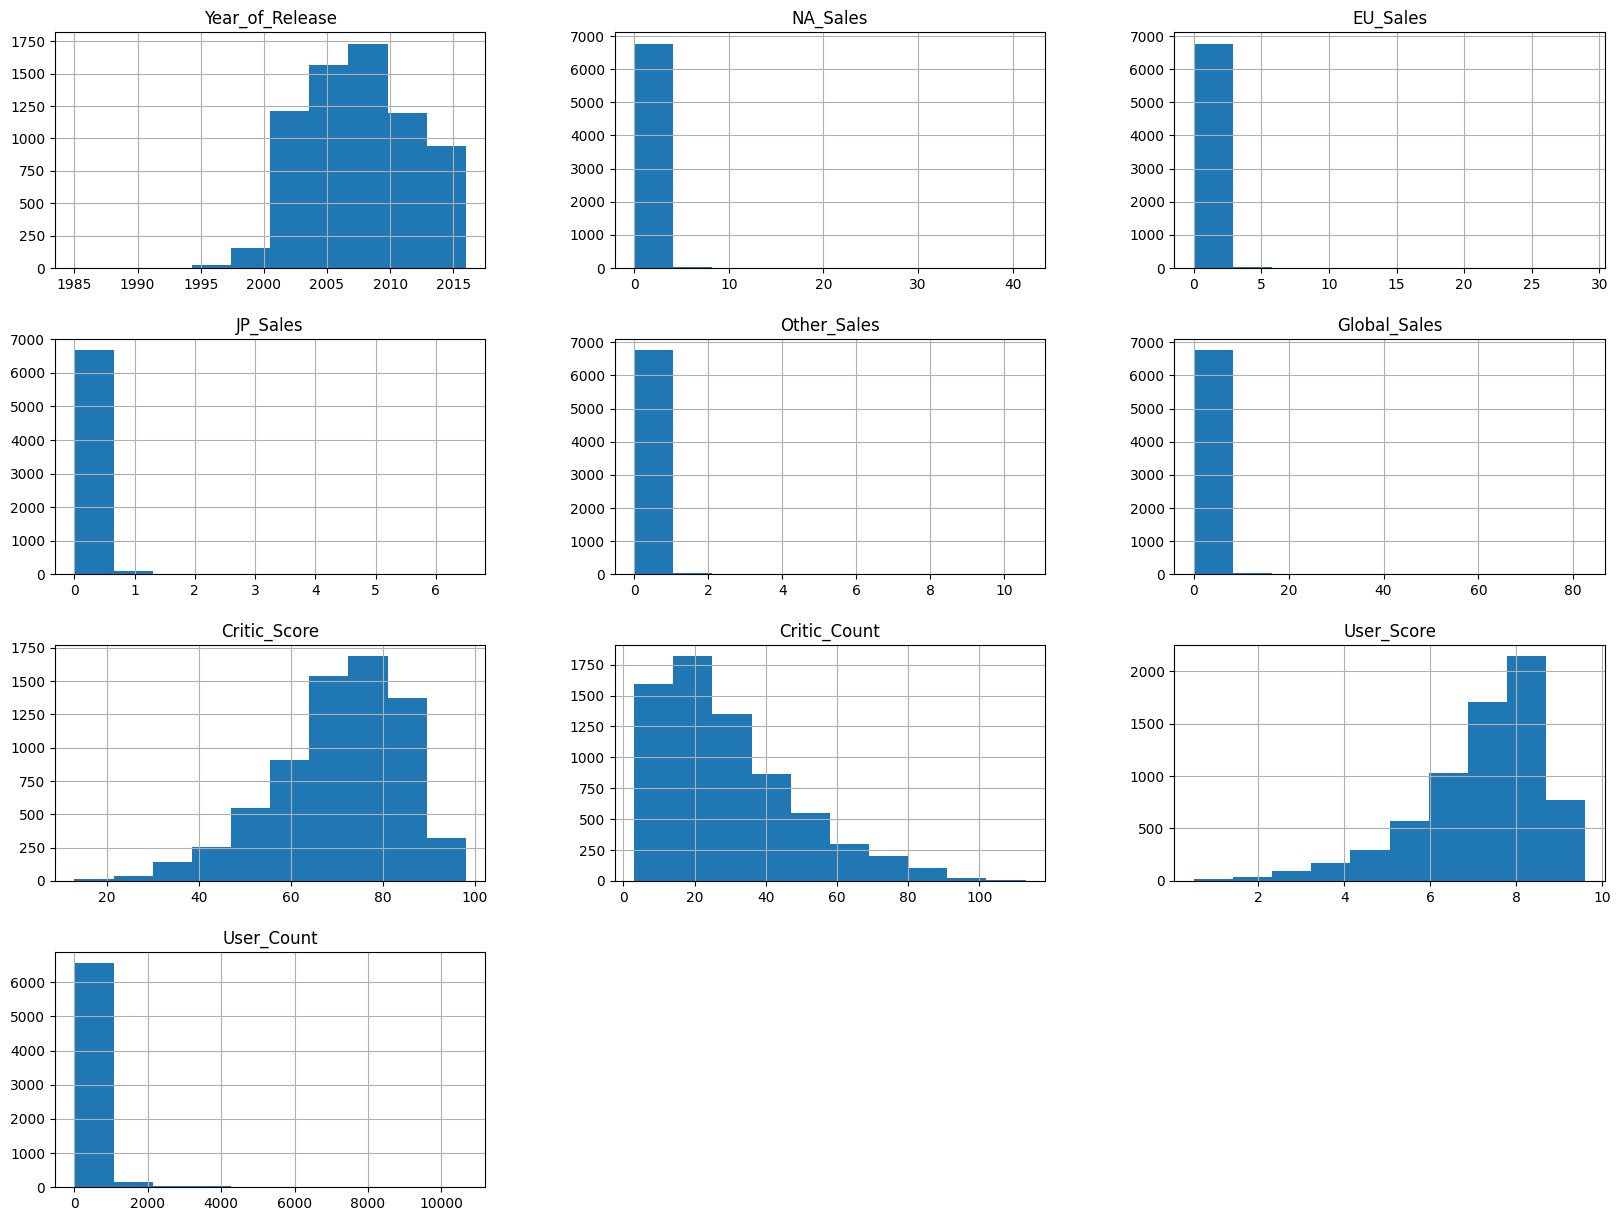

In [10]:
# Plotting a chart of all numerical datatypes

plt.figure(dpi = 100)
games_df.hist(figsize = (20, 15)) 
plt.show()

In [11]:
# Assigning all numerical and non-numerical datatypes in the to different variables

games_numeric_df = games_df.select_dtypes(exclude = "object")
games_object_df = games_df.select_dtypes(include = "object")

<AxesSubplot: >

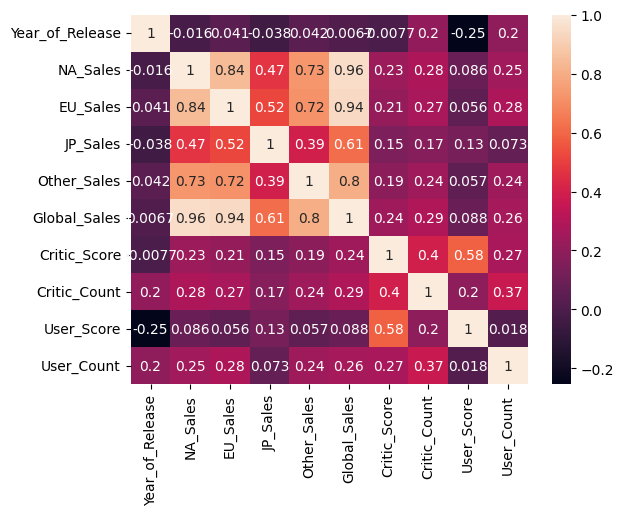

In [12]:
""" Checking for any correlation between other numerical columns 
    and Global Sales using a heat map.
    It was observed that only NA Sales, EU Sales, JP Sales 
    and Other Sales have a very good correlation with Global Sales.
"""

plt.figure(dpi=100)
sns.heatmap(games_numeric_df.corr(), annot = True)

In [13]:
# Dropping the Year_of_Release column because it has no correlation with Global_Sales

games_numeric_df = games_numeric_df.drop(['Year_of_Release'], axis=1)

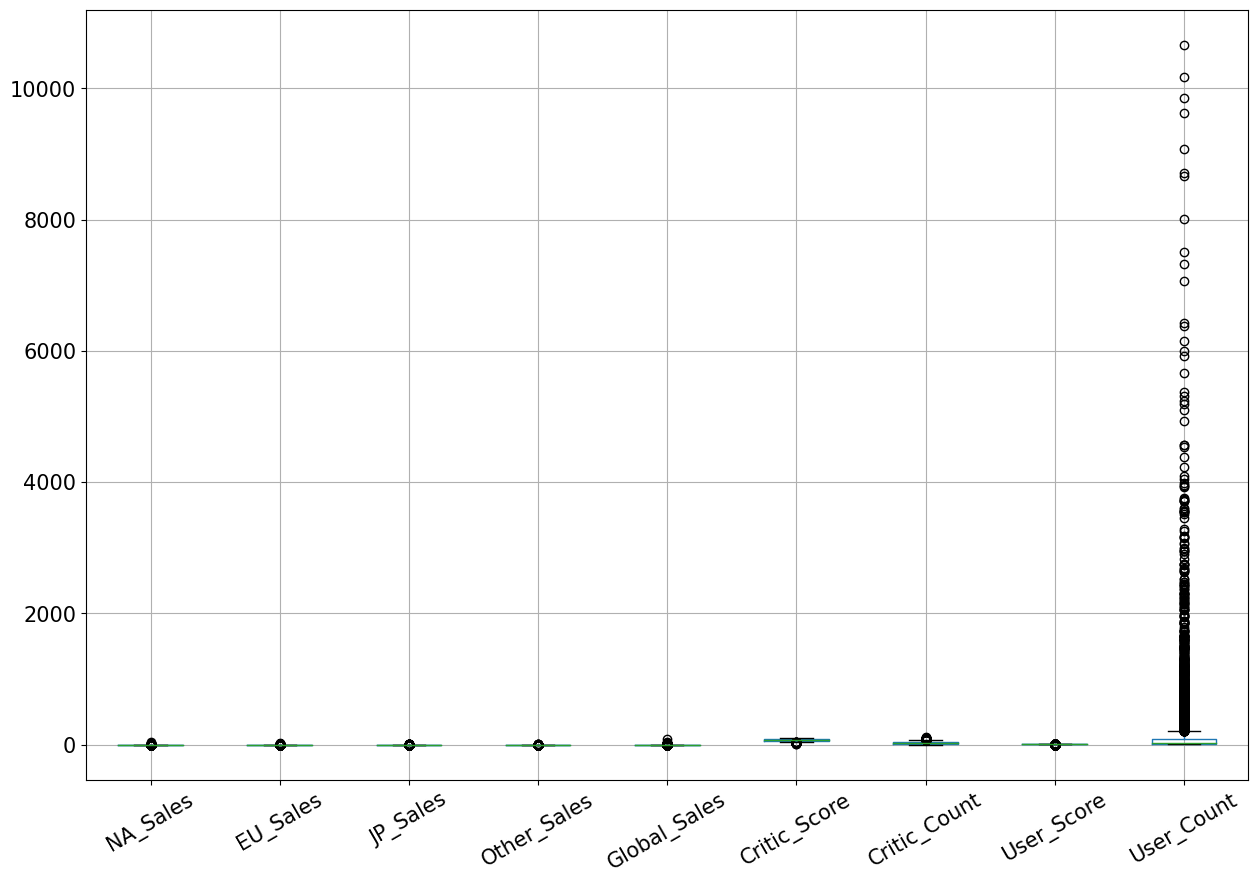

In [14]:
# Boxplot showing the count of each numerical entry
games_numeric_df.boxplot(figsize = (15,10), fontsize = 15, rot = 30) 
plt.show()

In [15]:
""" Importing train test split to split the dataset into 
    training and testing sets, and standardscaler
    to rescale the independent variables so that all columns 
    have equal effect when training the model.
    80% of the dataset will be used to train the model 
    while 20% would be used to test the model.
"""

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

In [16]:
# Assigning the independent variable to X and the target to y
X = games_numeric_df.drop(['Global_Sales'], axis=1)
y = games_numeric_df['Global_Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the dataset
scale = StandardScaler() 
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

# Converting the scaled attributes to a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns) 
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

#### Simple linear regression using only NA_Sales

In [17]:
""" All numerical columns would be used to predict Global Sales separately,
    they would be reshaped to a 2 dimensional array because 
    machine learning algorithms do not accept 1 dimensional arrrays.
    Same steps would be used for all simple linear regression.
"""

X_train_scaled['NA_Sales'].shape

(5460,)

In [18]:
# Reshaping the independent attributes
X_train_scaled_NA_Sales = X_train_scaled['NA_Sales'].to_numpy().reshape(-1,1)
X_test_scaled_NA_Sales = X_test_scaled['NA_Sales'].to_numpy().reshape(-1,1)

In [19]:
# Importing libraries to fit and train the model, and evaluate the model's performance

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [20]:
# Fitting a model to the dataset using linear regression
Global_Sales_NA_Sales = LinearRegression()

# Training the model using the training sets
Global_Sales_NA_Sales.fit(X_train_scaled_NA_Sales,y_train)

LinearRegression()

In [21]:
# Prediciting Global Sales with the testing sets
Global_Sales_pred = Global_Sales_NA_Sales.predict(X_test_scaled_NA_Sales)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_pred)
mean_squared = mean_squared_error(y_test,Global_Sales_pred)

# Printing the results 
print(f"The mean absolute error is: {mean_abs}")
print(f"The mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_pred)}")

The mean absolute error is: 0.24988980353506862
The mean squared error is : 0.36949580788472036
The root mean squared error is : 0.6078616683791801
The coefficient of determination is: 0.864039078070489


#### Simple linear using only EU_Sales

In [22]:
# Reshaping the independent attributes
X_train_scaled_EU_Sales = X_train_scaled['EU_Sales'].to_numpy().reshape(-1,1)
X_test_scaled_EU_Sales = X_test_scaled['EU_Sales'].to_numpy().reshape(-1,1)

# Fitting a model to the dataset using linear regression
Global_Sales_EU_Sales = LinearRegression()

# Training the model using the training sets
Global_Sales_EU_Sales.fit(X_train_scaled_EU_Sales,y_train)

LinearRegression()

In [23]:
# Prediciting Global Sales with the testing sets
Global_Sales_pred = Global_Sales_EU_Sales.predict(X_test_scaled_EU_Sales)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_pred)
mean_squared = mean_squared_error(y_test,Global_Sales_pred)

# Printing the results 
print(f"The mean absolute error is: {mean_abs}")
print(f"The mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_pred)}")

The mean absolute error is: 0.30618942862179366
The mean squared error is : 0.4131249647812541
The root mean squared error is : 0.6427479792121125
The coefficient of determination is: 0.8479851465560326


#### Simple linear using only JP_Sales

In [24]:
# Reshaping the independent attributes
X_train_scaled_JP_Sales = X_train_scaled['JP_Sales'].to_numpy().reshape(-1,1)
X_test_scaled_JP_Sales = X_test_scaled['JP_Sales'].to_numpy().reshape(-1,1)

# Fitting a model to the dataset using linear regression
Global_Sales_JP_Sales = LinearRegression()

# Training the model using the training sets
Global_Sales_JP_Sales.fit(X_train_scaled_JP_Sales,y_train)

LinearRegression()

In [25]:
# Prediciting Global Sales with the testing sets
Global_Sales_pred = Global_Sales_JP_Sales.predict(X_test_scaled_JP_Sales)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_pred)
mean_squared = mean_squared_error(y_test,Global_Sales_pred)

# Printing the results 
print(f"The mean absolute error is: {mean_abs}")
print(f"The mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_pred)}")

The mean absolute error is: 0.6930925233750604
The mean squared error is : 2.1016358436246216
The root mean squared error is : 1.4497019844177015
The coefficient of determination is: 0.22667499667964308


#### Simple linear using only Other_Sales

In [26]:
# Reshaping the independent attributes
X_train_scaled_Other_Sales = X_train_scaled['Other_Sales'].to_numpy().reshape(-1,1)
X_test_scaled_Other_Sales = X_test_scaled['Other_Sales'].to_numpy().reshape(-1,1)

# Fitting a model to the dataset using linear regression
Global_Sales_Other_Sales = LinearRegression()

# Training the model using the training sets
Global_Sales_Other_Sales.fit(X_train_scaled_Other_Sales,y_train)

LinearRegression()

In [27]:
# Prediciting Global Sales with the testing sets
Global_Sales_pred = Global_Sales_Other_Sales.predict(X_test_scaled_Other_Sales)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_pred)
mean_squared = mean_squared_error(y_test,Global_Sales_pred)

# Printing the results 
print(f"The mean absolute error is: {mean_abs}")
print(f"The mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_pred)}")

The mean absolute error is: 0.3837257505078336
The mean squared error is : 0.8162473608369203
The root mean squared error is : 0.9034640894008573
The coefficient of determination is: 0.6996508719889398


#### Simple linear using only Critic_Score

In [28]:
# Reshaping the independent attributes
X_train_scaled_Critic_Score = X_train_scaled['Critic_Score'].to_numpy().reshape(-1,1)
X_test_scaled_Critic_Score = X_test_scaled['Critic_Score'].to_numpy().reshape(-1,1)

# Fitting a model to the dataset using linear regression
Global_Sales_Critic_Score = LinearRegression()

# Training the model using the training sets
Global_Sales_Critic_Score.fit(X_train_scaled_Critic_Score,y_train)

LinearRegression()

In [29]:
# Prediciting Global Sales with the testing sets
Global_Sales_pred = Global_Sales_Critic_Score.predict(X_test_scaled_Critic_Score)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_pred)
mean_squared = mean_squared_error(y_test,Global_Sales_pred)

# Printing the results 
print(f"The mean absolute error is: {mean_abs}")
print(f"The mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_pred)}")

The mean absolute error is: 0.7816080262270287
The mean squared error is : 2.458650538060724
The root mean squared error is : 1.5680084623689772
The coefficient of determination is: 0.09530666729102033


#### Simple linear using only Critic_Count

In [30]:
# Reshaping the independent attributes
X_train_scaled_Critic_Count = X_train_scaled['Critic_Count'].to_numpy().reshape(-1,1)
X_test_scaled_Critic_Count = X_test_scaled['Critic_Count'].to_numpy().reshape(-1,1)

# Fitting a model to the dataset using linear regression
Global_Sales_Critic_Count = LinearRegression()

# Training the model using the training sets
Global_Sales_Critic_Count.fit(X_train_scaled_Critic_Count,y_train)

LinearRegression()

In [31]:
# Prediciting Global Sales with the testing sets
Global_Sales_pred = Global_Sales_Critic_Count.predict(X_test_scaled_Critic_Count)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_pred)
mean_squared = mean_squared_error(y_test,Global_Sales_pred)

# Printing the results 
print(f"The mean absolute error is: {mean_abs}")
print(f"The mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_pred)}")

The mean absolute error is: 0.7434696410839383
The mean squared error is : 2.377074739539784
The root mean squared error is : 1.541776488191393
The coefficient of determination is: 0.12532357286171458


#### Simple linear using only User_Score

In [32]:
# Reshaping the independent attributes
X_train_scaled_User_Score = X_train_scaled['User_Score'].to_numpy().reshape(-1,1)
X_test_scaled_User_Score = X_test_scaled['User_Score'].to_numpy().reshape(-1,1)

# Fitting a model to the dataset using linear regression
Global_Sales_User_Score = LinearRegression()

# Training the model using the training sets
Global_Sales_User_Score.fit(X_train_scaled_User_Score,y_train)

LinearRegression()

In [33]:
# Prediciting Global Sales with the testing sets
Global_Sales_pred = Global_Sales_User_Score.predict(X_test_scaled_User_Score)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_pred)
mean_squared = mean_squared_error(y_test,Global_Sales_pred)

# Printing the results 
print(f"The mean absolute error is: {mean_abs}")
print(f"The mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_pred)}")

The mean absolute error is: 0.8029051808775264
The mean squared error is : 2.709490367424247
The root mean squared error is : 1.6460529661661094
The coefficient of determination is: 0.003006798850980763


#### Simple linear using only User_Count

In [34]:
# Reshaping the independent attributes
X_train_scaled_User_Count = X_train_scaled['User_Count'].to_numpy().reshape(-1,1)
X_test_scaled_User_Count = X_test_scaled['User_Count'].to_numpy().reshape(-1,1)

# Fitting a model to the dataset using linear regression
Global_Sales_User_Count = LinearRegression()

# Training the model using the training sets
Global_Sales_User_Count.fit(X_train_scaled_User_Count,y_train)

LinearRegression()

In [35]:
# Prediciting Global Sales with the testing sets
Global_Sales_pred = Global_Sales_User_Count.predict(X_test_scaled_User_Count)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_pred)
mean_squared = mean_squared_error(y_test,Global_Sales_pred)

# Printing the results 
print(f"The mean absolute error is: {mean_abs}")
print(f"The mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_pred)}")

The mean absolute error is: 0.7535376350392925
The mean squared error is : 2.3306029917476567
The root mean squared error is : 1.5266312559841215
The coefficient of determination is: 0.1424234736959472


### Multple Linear Regression

#### Mlr using NA_Sales and EU_Sales

In [36]:
""" All possible numerical pairs were gotten 
    and used to predict Global Sales, this time there was no need to 
    reshape the attributes because they're no longer 1 dimensional.
    Same steps would be used for all multi linear regression
"""

# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_NA_EU = X_train_scaled[['NA_Sales','EU_Sales']]
X_test_scaled_NA_EU = X_test_scaled[['NA_Sales','EU_Sales']]

# Fitting a model to the dataset using linear regression
Global_Sales_NA_EU = LinearRegression()

# Training the model using the training sets
Global_Sales_NA_EU.fit(X_train_scaled_NA_EU,y_train)

LinearRegression()

In [37]:
# Prediciting Global Sales with the testing sets
Global_Sales_preds = Global_Sales_NA_EU.predict(X_test_scaled_NA_EU)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results 
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.0990128172286067
The result of the mean squared error is : 0.058804415744344286
The root mean squared error is : 0.24249621800008406
The coefficient of determination is: 0.9783621291296986


#### Mlr using NA_Sales and JP_Sales

In [38]:
# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_NA_JP = X_train_scaled[['NA_Sales','JP_Sales']]
X_test_scaled_NA_JP = X_test_scaled[['NA_Sales','JP_Sales']]

# Fitting a model to the dataset using linear regression
Global_Sales_NA_JP = LinearRegression()

# Training the model using the training sets
Global_Sales_NA_JP.fit(X_train_scaled_NA_JP,y_train)

LinearRegression()

In [39]:
# Prediciting Global Sales with the testing sets
Global_Sales_preds = Global_Sales_NA_JP.predict(X_test_scaled_NA_JP)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results 
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.20345458090232235
The result of the mean squared error is : 0.22342183386424178
The root mean squared error is : 0.4726751885430859
The coefficient of determination is: 0.9177889495275637


#### Mlr using NA_Sales and Other_Sales

In [40]:
# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_NA_Other = X_train_scaled[['NA_Sales','Other_Sales']]
X_test_scaled_NA_Other = X_test_scaled[['NA_Sales','Other_Sales']]

# Fitting a model to the dataset using linear regression
Global_Sales_NA_Other = LinearRegression()

# Training the model using the training sets
Global_Sales_NA_Other.fit(X_train_scaled_NA_Other,y_train)

LinearRegression()

In [41]:
# Prediciting Global Sales with the testing sets
Global_Sales_preds = Global_Sales_NA_Other.predict(X_test_scaled_NA_Other)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results 
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.19100184839886986
The result of the mean squared error is : 0.22946500041393106
The root mean squared error is : 0.4790250519690291
The coefficient of determination is: 0.9155652856105818


#### Mlr using EU_Sales and JP_Sales

In [42]:
# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_EU_JP = X_train_scaled[['EU_Sales','JP_Sales']]
X_test_scaled_EU_JP = X_test_scaled[['EU_Sales','JP_Sales']]

# Fitting a model to the dataset using linear regression
Global_Sales_EU_JP = LinearRegression()

# Training the model using the training sets
Global_Sales_EU_JP.fit(X_train_scaled_EU_JP,y_train)

LinearRegression()

In [43]:
# Prediciting Global Sales with the testing sets
Global_Sales_preds = Global_Sales_EU_JP.predict(X_test_scaled_EU_JP)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results 
print(f"The mean_absolute_error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The root mean squared error is : {np.sqrt(mean_squared):.2f}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds):.2f}")

The mean_absolute_error is: 0.27
The result of the mean squared error is : 0.38
The root mean squared error is : 0.61
The coefficient of determination is: 0.86


#### Mlr using EU_Sales and Other_Sales

In [44]:
# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_EU_Other = X_train_scaled[['EU_Sales','Other_Sales']]
X_test_scaled_EU_Other = X_test_scaled[['EU_Sales','Other_Sales']]

# Fitting a model to the dataset using linear regression
Global_Sales_EU_Other = LinearRegression()

# Training the model using the training sets
Global_Sales_EU_Other.fit(X_train_scaled_EU_Other,y_train)

LinearRegression()

In [45]:
# Prediciting Global Sales with the testing sets
Global_Sales_preds = Global_Sales_EU_Other.predict(X_test_scaled_EU_Other)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results 
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.2783852395667685
The result of the mean squared error is : 0.349609948979469
The root mean squared error is : 0.5912782331351873
The coefficient of determination is: 0.8713563456887502


#### Mlr using JP_Sales and Other_Sales

In [46]:
# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_JP_Other = X_train_scaled[['JP_Sales','Other_Sales']]
X_test_scaled_JP_Other = X_test_scaled[['JP_Sales','Other_Sales']]

# Fitting a model to the dataset using linear regression
Global_Sales_JP_Other = LinearRegression()

# Training the model using the training sets
Global_Sales_JP_Other.fit(X_train_scaled_JP_Other,y_train)

LinearRegression()

In [47]:
# Prediciting Global Sales with the testing sets
Global_Sales_preds = Global_Sales_JP_Other.predict(X_test_scaled_JP_Other)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results 
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.362596435086021
The result of the mean squared error is : 0.7029554413668816
The root mean squared error is : 0.8384243802316829
The coefficient of determination is: 0.7413381482438197


#### Mlr using NA_Sales, EU_Sales and JP_Sales

In [48]:
# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_NA_EU_JP = X_train_scaled[['NA_Sales','EU_Sales', 'JP_Sales']]
X_test_scaled_NA_EU_JP = X_test_scaled[['NA_Sales','EU_Sales', 'JP_Sales']]

# Fitting a model to the dataset using linear regression
Global_Sales_NA_EU_JP = LinearRegression()

# Training the model using the training sets
Global_Sales_NA_EU_JP.fit(X_train_scaled_NA_EU_JP,y_train)

LinearRegression()

In [49]:
# Prediciting Global Sales with the testing sets
Global_Sales_preds = Global_Sales_NA_EU_JP.predict(X_test_scaled_NA_EU_JP)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results 
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.04181539203545188
The result of the mean squared error is : 0.014127438020291334
The root mean squared error is : 0.11885889962594864
The coefficient of determination is: 0.9948016203249047


#### Mlr using NA_Sales, EU_Sales and Other_Sales

In [50]:
# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_NA_EU_Other = X_train_scaled[['NA_Sales','EU_Sales', 'Other_Sales']]
X_test_scaled_NA_EU_Other = X_test_scaled[['NA_Sales','EU_Sales', 'Other_Sales']]

# Fitting a model to the dataset using linear regression
Global_Sales_NA_EU_Other = LinearRegression()

# Training the model using the training sets
Global_Sales_NA_EU_Other.fit(X_train_scaled_NA_EU_Other,y_train)

LinearRegression()

In [51]:
# Prediciting Global Sales with the testing sets
Global_Sales_preds = Global_Sales_NA_EU_Other.predict(X_test_scaled_NA_EU_Other)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results 
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.08874473221119884
The result of the mean squared error is : 0.04608925188119011
The root mean squared error is : 0.2146840745867986
The coefficient of determination is: 0.9830408436494005


#### Mlr using NA_Sales, JP_Sales and Other_Sales

In [52]:
# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_NA_JP_Other = X_train_scaled[['NA_Sales','JP_Sales', 'Other_Sales']]
X_test_scaled_NA_JP_Other = X_test_scaled[['NA_Sales','JP_Sales', 'Other_Sales']]

# Fitting a model to the dataset using linear regression
Global_Sales_NA_JP_Other = LinearRegression()

# Training the model using the training sets
Global_Sales_NA_JP_Other.fit(X_train_scaled_NA_JP_Other,y_train)

LinearRegression()

In [53]:
# Prediciting Global Sales with the testing sets
Global_Sales_preds = Global_Sales_NA_JP_Other.predict(X_test_scaled_NA_JP_Other)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results 
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.1481399921728148
The result of the mean squared error is : 0.11677324854128465
The root mean squared error is : 0.34172100980373543
The coefficient of determination is: 0.9570317221749635


#### Mlr using EU_Sales, JP_Sales and Other_Sales

In [54]:
# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_EU_JP_Other = X_train_scaled[['EU_Sales','JP_Sales', 'Other_Sales']]
X_test_scaled_EU_JP_Other = X_test_scaled[['EU_Sales','JP_Sales', 'Other_Sales']]

# Fitting a model to the dataset using linear regression
Global_Sales_EU_JP_Other = LinearRegression()

# Training the model using the training sets
Global_Sales_EU_JP_Other.fit(X_train_scaled_EU_JP_Other,y_train)

LinearRegression()

In [55]:
# Prediciting Global Sales with the testing sets
Global_Sales_preds = Global_Sales_EU_JP_Other.predict(X_test_scaled_EU_JP_Other)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results 
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.24072330238768658
The result of the mean squared error is : 0.30416572198648945
The root mean squared error is : 0.5515122138144263
The coefficient of determination is: 0.8880781565090428


#### Mlr using NA_Sales, EU_Sales, JP_Sales and Other_Sales

In [56]:
# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_NA_EU_JP_Other=X_train_scaled[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
X_test_scaled_NA_EU_JP_Other=X_test_scaled[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

# Fitting a model to the dataset using linear regression
Global_Sales_NA_EU_JP_Other = LinearRegression()

# Training the model using the training sets
Global_Sales_NA_EU_JP_Other.fit(X_train_scaled_NA_EU_JP_Other,y_train)

LinearRegression()

In [57]:
# Prediciting Global Sales with the testing sets
Global_Sales_preds = Global_Sales_NA_EU_JP_Other.predict(X_test_scaled_NA_EU_JP_Other)

# Evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results 
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.0037726413477802926
The result of the mean squared error is : 3.6611038652405054e-05
The root mean squared error is : 0.006050705632602288
The coefficient of determination is: 0.9999865284789117


In [58]:
# Evaluating the model on the training data in order to check for overfitting 

train_predictions = Global_Sales_NA_EU_JP_Other.predict(X_train_scaled_NA_EU_JP_Other)
train_error = mean_squared_error(y_train, train_predictions)

error_diff = abs(train_error-mean_squared)

if error_diff < 0.05:
    print(f'{error_diff:.2f} is less than 0.05, the model is not overfitting')
else:
    print(f'{error_diff:.2f} is more than 0.05, the model is overfitting')


0.00 is less than 0.05, the model is not overfitting


#### Mlr using all independent variables

In [59]:
# Fitting a model to the dataset using linear regression
Mlr_Global_Sales = LinearRegression()

# Training the model using the training sets
Mlr_Global_Sales.fit(X_train_scaled,y_train)

# Prediciting Global Sales with the testing sets
Global_Sales_preds = Mlr_Global_Sales.predict(X_test_scaled)

# evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.003778035384663335
The result of the mean squared error is : 3.658286779610398e-05
The root mean squared error is : 0.006048377286190403
The coefficient of determination is: 0.9999865388447549


In [60]:
# Evaluate the model on the training data in order to check for overfitting 

train_predictions = Mlr_Global_Sales.predict(X_train_scaled)
train_error = mean_squared_error(y_train, train_predictions)

error_diff = abs(train_error-mean_squared)

if error_diff < 0.05:
    print(f'{error_diff:.2f} is less than 0.05, the model is not overfitting')
else:
    print(f'{error_diff:.2f} is more than 0.05, the model is overfitting')


0.00 is less than 0.05, the model is not overfitting


#### Using Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
# Fitting a model to the dataset using Random Forest Regression
rf_Global_Sales = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model using the training sets
rf_Global_Sales.fit(X_train_scaled,y_train)

# Prediciting Global Sales with the testing sets
Global_Sales_preds = rf_Global_Sales.predict(X_test_scaled)

# evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.044492527472527486
The result of the mean squared error is : 0.04625836541391934
The root mean squared error is : 0.21507757998898755
The coefficient of determination is: 0.9829786160643238


#### Using Gradient Boosting Regressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
# Fitting a model to the dataset using Gradient Boosting Regression
gb_Global_Sales = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training the model using the training sets
gb_Global_Sales.fit(X_train_scaled,y_train)

# Prediciting Global Sales with the testing sets
Global_Sales_preds = gb_Global_Sales.predict(X_test_scaled)

# evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.049332534638911046
The result of the mean squared error is : 0.04597293837994624
The root mean squared error is : 0.21441300888692888
The coefficient of determination is: 0.9830836427570615


#### Using Lasso Regressor

In [65]:
from sklearn.linear_model import Lasso

In [66]:
# Fitting a model to the dataset using Lasso
lasso_Global_Sales = Lasso(alpha = 0.1)

# Training the model using the training sets
lasso_Global_Sales.fit(X_train_scaled,y_train)

# Prediciting Global Sales with the testing sets
Global_Sales_preds = lasso_Global_Sales.predict(X_test_scaled)

# evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.04419746237412852
The result of the mean squared error is : 0.008018873776969415
The root mean squared error is : 0.08954816456505077
The coefficient of determination is: 0.9970493481974949


#### Using Support Vector Regressor

In [67]:
from sklearn.svm import SVR

In [68]:
# Fitting a model to the dataset using Support Vector Regressor
svr_Global_Sales = SVR(kernel = 'linear')

# Training the model using the training sets
svr_Global_Sales.fit(X_train_scaled,y_train)

# Prediciting Global Sales with the testing sets
Global_Sales_preds = svr_Global_Sales.predict(X_test_scaled)

# evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.015505048505672926
The result of the mean squared error is : 0.00036807458428875553
The root mean squared error is : 0.01918526998217006
The coefficient of determination is: 0.9998645620362915


#### Using K Neighbors Regressor

In [69]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
# Fitting a model to the dataset using K Neighbors Regressor
kn_Global_Sales = KNeighborsRegressor(n_neighbors=5, weights='distance')

# Training the model using the training sets
kn_Global_Sales.fit(X_train_scaled,y_train)

# Prediciting Global Sales with the testing sets
Global_Sales_preds = kn_Global_Sales.predict(X_test_scaled)

# evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,Global_Sales_preds) 
mean_squared = mean_squared_error(y_test,Global_Sales_preds)

# Printing the results
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,Global_Sales_preds)}")

The mean_absolute_error is: 0.1466478973586948
The result of the mean squared error is : 0.14122084645485475
The root mean squared error is : 0.3757936221582995
The coefficient of determination is: 0.9480359017072844


### B. Using Critic_Score, Critic_Count, User_Score and User_Count to predict the sales of video games in North America, EU and Japan    

#### Prediciting the video game sales in North America using Multi Linear Regression

In [71]:
# Assigning the independent variable to X and the target to y
X = games_numeric_df.drop(['NA_Sales'], axis=1)
y = games_numeric_df['NA_Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the dataset
scale = StandardScaler() 
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

# Converting the scaled attributes to a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns) 
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_CS_CC_US_UC=X_train_scaled[['Critic_Score','Critic_Count','User_Score','User_Count']]
X_test_scaled_CS_CC_US_UC=X_test_scaled[['Critic_Score','Critic_Count','User_Score','User_Count']]

# Fitting a model to the dataset using Linear Regressor
NA_Sales_CS_CC_US_UC = LinearRegression()

# Training the model using the training sets
NA_Sales_CS_CC_US_UC.fit(X_train_scaled_CS_CC_US_UC, y_train)

LinearRegression()

In [72]:
# Prediciting North America Sales with the testing sets
NA_Sales_preds = NA_Sales_CS_CC_US_UC.predict(X_test_scaled_CS_CC_US_UC)

# evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,NA_Sales_preds) 
mean_squared = mean_squared_error(y_test,NA_Sales_preds)

# Printing the results
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,NA_Sales_preds)}")

The mean_absolute_error is: 0.3847127451568863
The result of the mean squared error is : 0.631836251504928
The root mean squared error is : 0.7948812813904527
The coefficient of determination is: 0.1829967897690894


#### Prediciting the video game sales in EU using Multi Linear Regression

In [73]:
# Assigning the independent variable to X and the target to y
X = games_numeric_df.drop(['EU_Sales'], axis=1)
y = games_numeric_df['EU_Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the dataset
scale = StandardScaler() 
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

# Converting the scaled attributes to a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns) 
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_CS_CC_US_UC=X_train_scaled[['Critic_Score','Critic_Count','User_Score','User_Count']]
X_test_scaled_CS_CC_US_UC=X_test_scaled[['Critic_Score','Critic_Count','User_Score','User_Count']]

# Fitting a model to the dataset using Linear Regressor
EU_Sales_CS_CC_US_UC = LinearRegression()

# Training the model using the training sets
EU_Sales_CS_CC_US_UC.fit(X_train_scaled_CS_CC_US_UC, y_train)

LinearRegression()

In [74]:
# Prediciting EU Sales with the testing sets
EU_Sales_preds = EU_Sales_CS_CC_US_UC.predict(X_test_scaled_CS_CC_US_UC)

# evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,EU_Sales_preds) 
mean_squared = mean_squared_error(y_test,EU_Sales_preds)

# Printing the results
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,EU_Sales_preds)}")

The mean_absolute_error is: 0.2450934197077495
The result of the mean squared error is : 0.2745743030488991
The root mean squared error is : 0.5239983807693485
The coefficient of determination is: 0.20162224285192953


#### Prediciting the video game sales in Japan using Multi Linear Regression

In [75]:
# Assigning the independent variable to X and the target to y
X = games_numeric_df.drop(['JP_Sales'], axis=1)
y = games_numeric_df['JP_Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the dataset
scale = StandardScaler() 
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

# Converting the scaled attributes to a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns) 
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

# Assigning the coulumns needed for training and testing to different variables
X_train_scaled_CS_CC_US_UC=X_train_scaled[['Critic_Score','Critic_Count','User_Score','User_Count']]
X_test_scaled_CS_CC_US_UC=X_test_scaled[['Critic_Score','Critic_Count','User_Score','User_Count']]

# Fitting a model to the dataset using Linear Regressor
JP_Sales_CS_CC_US_UC = LinearRegression()

# Training the model using the training sets
JP_Sales_CS_CC_US_UC.fit(X_train_scaled_CS_CC_US_UC, y_train)

LinearRegression()

In [76]:
# Prediciting JP Sales with the testing sets
JP_Sales_preds = JP_Sales_CS_CC_US_UC.predict(X_test_scaled_CS_CC_US_UC)

# evaluating the performance of the model
mean_abs = mean_absolute_error(y_test,JP_Sales_preds) 
mean_squared = mean_squared_error(y_test,JP_Sales_preds)

# Printing the results
print(f"The mean_absolute_error is: {mean_abs}")
print(f"The result of the mean squared error is : {mean_squared}")
print(f"The root mean squared error is : {np.sqrt(mean_squared)}")
print(f"The coefficient of determination is: {r2_score(y_test,JP_Sales_preds)}")

The mean_absolute_error is: 0.09303458236282912
The result of the mean squared error is : 0.051477834875962095
The root mean squared error is : 0.22688727349933513
The coefficient of determination is: 0.02707360931326641


### C. Choice of regressor

In [77]:
# Answered in the report

### D. Using all the relevant categorical variables as the target variable at each instance to classify the dataset 

In [78]:
""" The relevant categorical variables were gotten by obtaining
    the number of their unique values. 
    The ones with not so much unique values were considered relevant. 
"""

# Assigning the dataset to a new variable so that any changes made won't be permanent.
games_dfc = games_df 

In [79]:
games_dfc['Name'].nunique()

4377

In [80]:
games_dfc['Platform'].nunique()

17

In [81]:
games_dfc['Platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [82]:
games_dfc['Genre'].nunique()

12

In [83]:
games_dfc['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [84]:
games_dfc['Publisher'].nunique()

262

In [85]:
games_dfc['Developer'].nunique()

1289

In [86]:
games_dfc['Rating'].nunique()

7

In [87]:
games_dfc['Rating'].unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

#### Using Rating as the target variable to classify the dataset with a logistic regressor

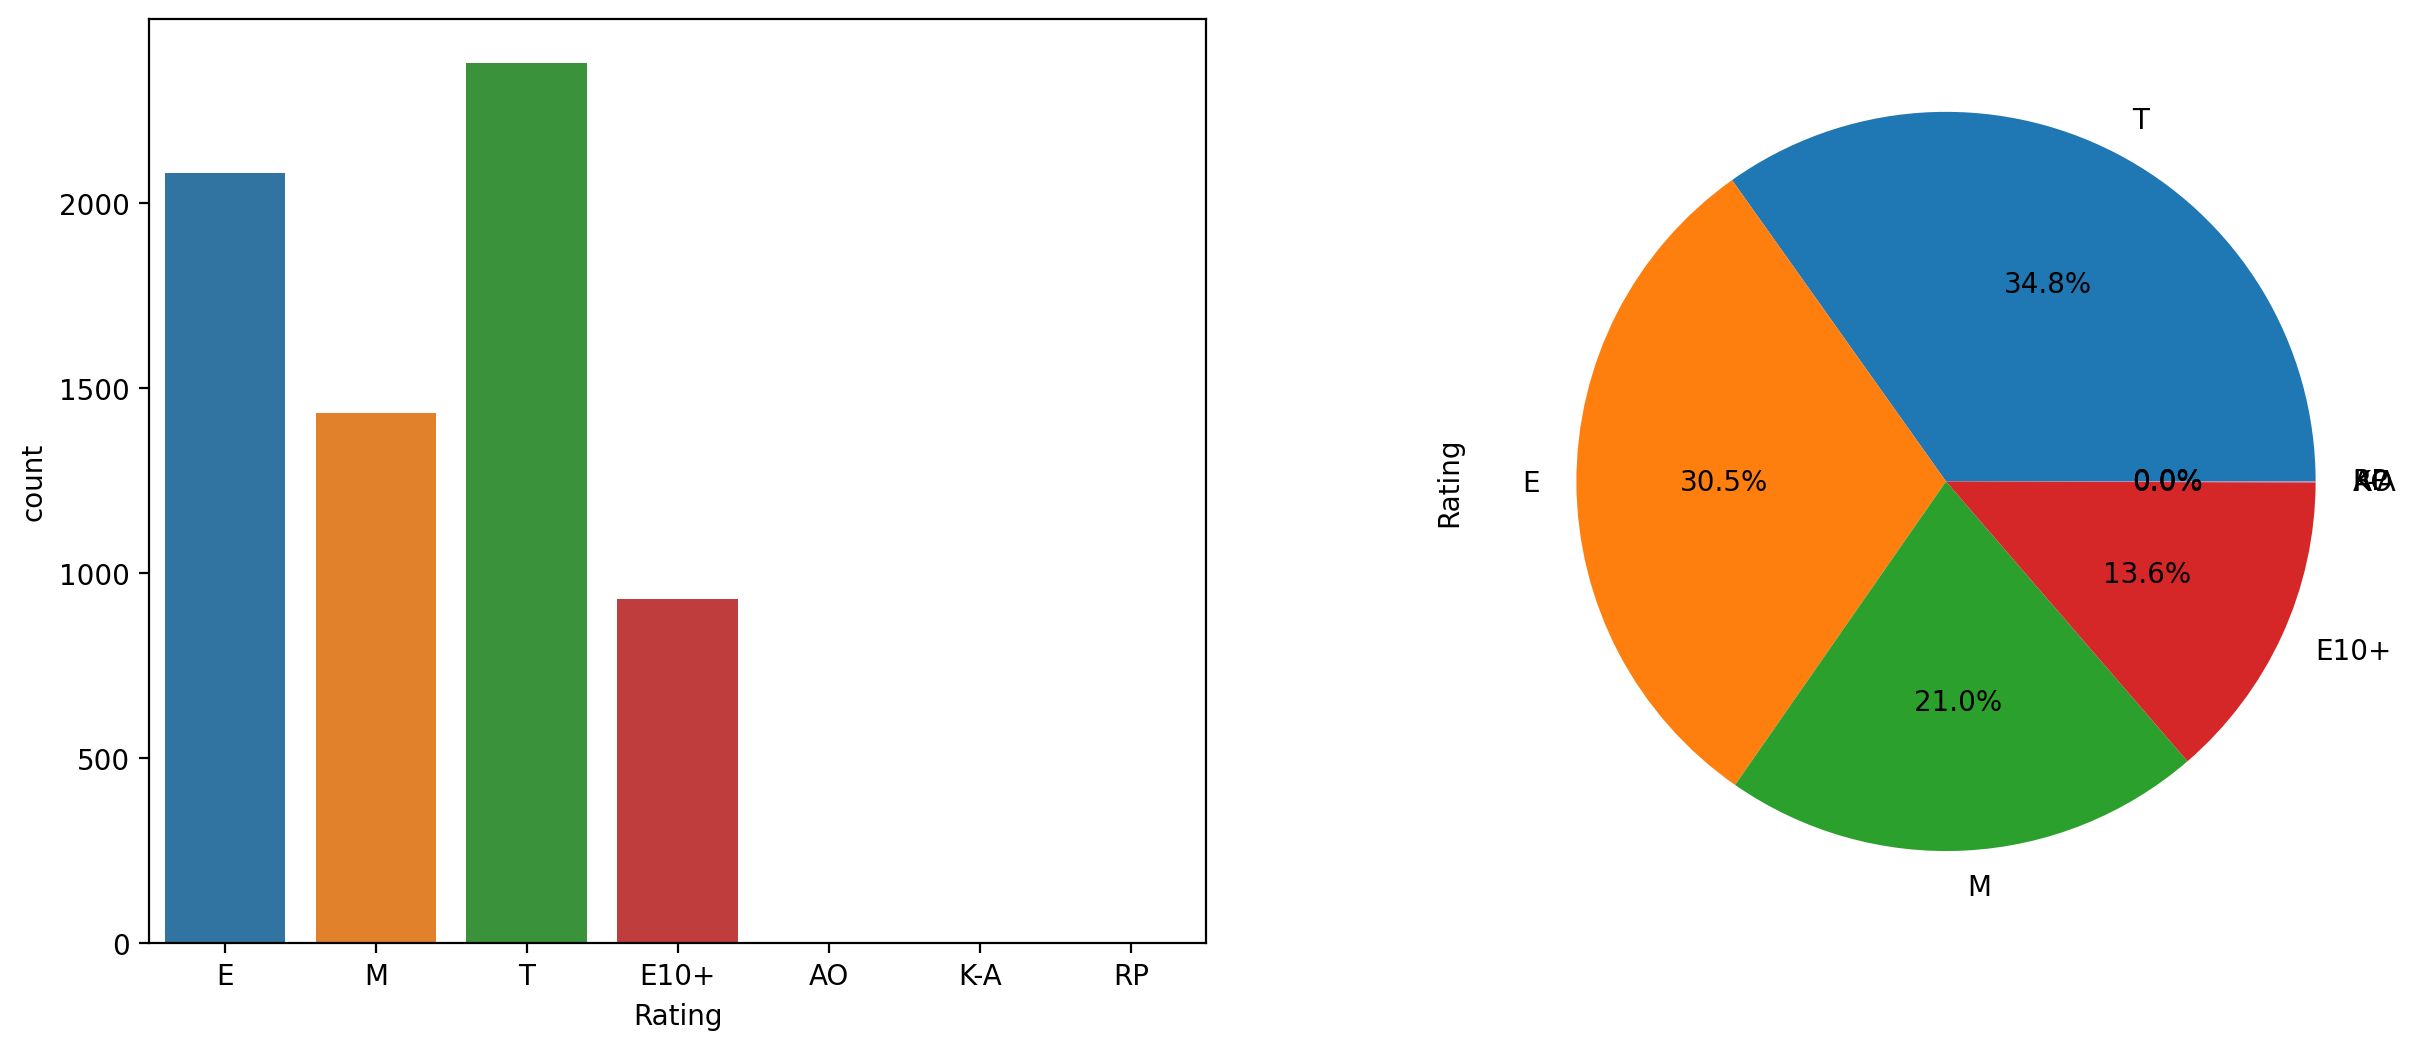

In [88]:
# Subplotting the dataset to see if it is unbalanced

fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200)
a = sns.countplot(x = 'Rating', data = games_dfc, ax=ax_position[0])
a = games_dfc['Rating'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1])

In [89]:
# Importing MinMaxScaler for normalisation or standardisation
from sklearn.preprocessing import MinMaxScaler  

In [90]:
""" Obtaining the indexes of all the attributes that have 
    only one occurence of the unique values in the rating column 
    whilst dropping them so as to carry out resampling techniques for classification
    because there can't be only one instance of a category if the model is meant to learn.
"""

games_dfc[games_dfc['Rating']=='AO']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
578,Grand Theft Auto: San Andreas,XB,2005,Action,Take-Two Interactive,1.26,0.61,0.0,0.09,1.95,93,58,8.6,118,Rockstar North,AO


In [91]:
games_dfc[games_dfc['Rating']=='K-A']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
596,PaRappa The Rapper,PS,1996,Misc,Sony Computer Entertainment,0.26,0.16,1.46,0.03,1.92,92,15,7.4,48,NanaOn-Sha,K-A


In [92]:
games_dfc[games_dfc['Rating']=='RP']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
6370,Supreme Ruler: Cold War,PC,2011,Strategy,Paradox Interactive,0.0,0.03,0.0,0.01,0.03,63,12,6.8,27,BattleGoat Studios,RP


In [93]:
# Dropping the rows with only 1 occurrence of Rating category
games_dfc = games_dfc.drop(578)
games_dfc = games_dfc.drop(596)
games_dfc = games_dfc.drop(6370)

games_dfc = games_dfc.reset_index(drop=True)

In [94]:
# Asigning the numerical and categorical variables to different variables
games_numeric_dfc = games_dfc.select_dtypes(exclude =object)
games_object_dfc = games_dfc.select_dtypes(include =object)

# Assigning the independent variable to X and the target to y
X = games_numeric_dfc
y = games_object_dfc['Rating']

In [95]:
# importing SMOTE
from imblearn.over_sampling import SMOTE

# Creating the object
sm = SMOTE(random_state=42, k_neighbors = 2) 

# applying SMOTE to resample the dataset
X_res, y_res = sm.fit_resample(X, y)

X, y = X_res, y_res # reassigning the balanced dataset to X,y

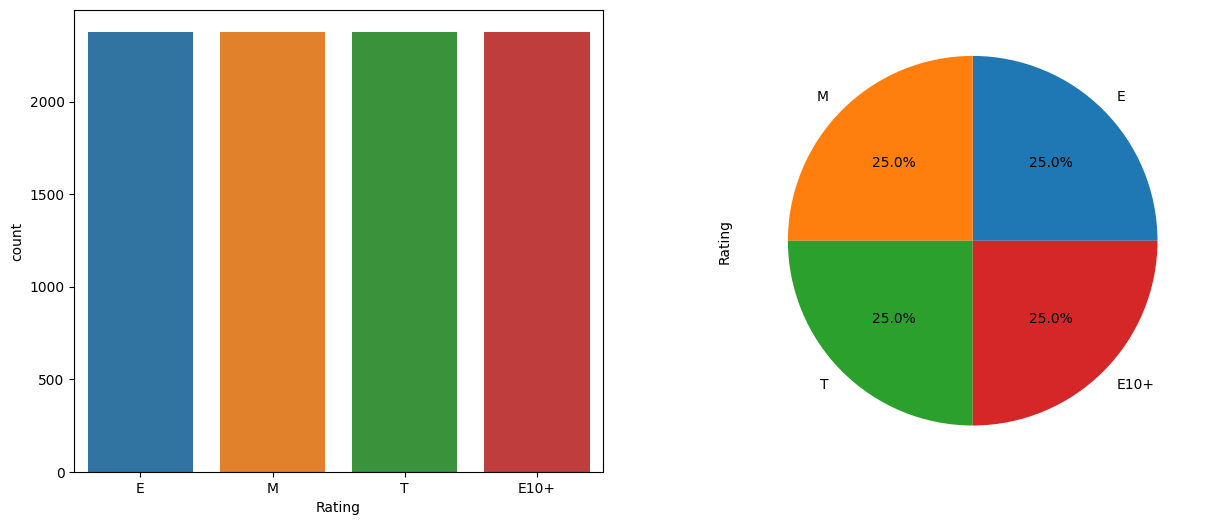

In [96]:
# Subplotting the balanced dataset 

bal_games_dfc = pd.concat([X_res,y_res], axis = 1) 
fig, ax=plt.subplots(1,2,figsize=(15,6))
a = sns.countplot(x='Rating',data=bal_games_dfc, ax=ax[0])  
a= bal_games_dfc['Rating'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) 


In [97]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the dataset
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [98]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             roc_auc_score)

from sklearn.linear_model import LogisticRegression

In [99]:
# Fitting a model to the dataset using Logistic Regressor
games_classifier = LogisticRegression()

# Training the model using the training sets
games_classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [100]:
# Predicting Rating using the testing set
rating_pred = games_classifier.predict(X_test_scaled)

In [101]:
# Printing the classification report
print(classification_report(y_test,rating_pred))

              precision    recall  f1-score   support

           E       0.45      0.48      0.46       491
        E10+       0.37      0.42      0.39       477
           M       0.47      0.45      0.46       456
           T       0.30      0.25      0.27       478

    accuracy                           0.40      1902
   macro avg       0.40      0.40      0.40      1902
weighted avg       0.40      0.40      0.40      1902



In [102]:
# Printing the confusion matrix
print(confusion_matrix(y_test, rating_pred))

[[238 134  33  86]
 [100 198  87  92]
 [ 64  90 204  98]
 [131 114 114 119]]


#### Using Rating as the target variable to classify the dataset with K Neighbors Classifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
# Fitting a model to the dataset using K Neighbours
games_classifier = KNeighborsClassifier()

# Training the model using the training sets
games_classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [105]:
# Predicting Rating using the testing set
rating_pred = games_classifier.predict(X_test_scaled)

In [106]:
# Printing the classification report
print(classification_report(y_test,rating_pred))

              precision    recall  f1-score   support

           E       0.49      0.48      0.48       491
        E10+       0.53      0.69      0.60       477
           M       0.53      0.60      0.56       456
           T       0.37      0.22      0.27       478

    accuracy                           0.50      1902
   macro avg       0.48      0.50      0.48      1902
weighted avg       0.48      0.50      0.48      1902



In [107]:
# Printing the confusion matrix
print(confusion_matrix(y_test, rating_pred))

[[235 118  57  81]
 [ 62 329  50  36]
 [ 51  72 274  59]
 [132 104 138 104]]


#### Using Rating as the target variable to classify the dataset with Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB

In [109]:
# Fitting a model to the dataset using Naive Bayes
games_classifier = GaussianNB()

# Training the model using the training sets
games_classifier.fit(X_train_scaled,y_train)

GaussianNB()

In [110]:
# Predicting Rating using the testing set
rating_pred = games_classifier.predict(X_test_scaled)

In [111]:
# Printing the classification report
print(classification_report(y_test,rating_pred))

              precision    recall  f1-score   support

           E       0.44      0.09      0.15       491
        E10+       0.35      0.87      0.50       477
           M       0.65      0.23      0.34       456
           T       0.32      0.30      0.31       478

    accuracy                           0.37      1902
   macro avg       0.44      0.37      0.32      1902
weighted avg       0.44      0.37      0.32      1902



In [112]:
# Printing the confusion matrix
print(confusion_matrix(y_test, rating_pred))

[[ 44 262  15 170]
 [ 24 415  16  22]
 [ 11 226 104 115]
 [ 22 287  25 144]]


#### Using Rating as the target variable to classify the dataset with Support Vector Machine

In [113]:
from sklearn.svm import SVC

In [114]:
# Fitting a model to the dataset using Support Vector Machine
games_classifier = SVC()

# Training the model using the training sets
games_classifier.fit(X_train_scaled,y_train)

SVC()

In [115]:
# Predicting Rating using the testing set
rating_pred = games_classifier.predict(X_test_scaled)

In [116]:
# Printing the classification report
print(classification_report(y_test,rating_pred))

              precision    recall  f1-score   support

           E       0.53      0.42      0.47       491
        E10+       0.41      0.65      0.50       477
           M       0.47      0.52      0.50       456
           T       0.35      0.19      0.24       478

    accuracy                           0.44      1902
   macro avg       0.44      0.44      0.43      1902
weighted avg       0.44      0.44      0.43      1902



In [117]:
# Printing the confusion matrix
print(confusion_matrix(y_test, rating_pred))

[[205 193  40  53]
 [ 41 311  89  36]
 [ 50  93 239  74]
 [ 91 161 137  89]]


#### Using Rating as the target variable to classify the dataset with Decision Tree Classifier

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [119]:
# Converting the target variable to numerical using label encoding
label_encoder = LabelEncoder()
games_df_Rating = label_encoder.fit_transform(games_df['Rating'])

# Assigning the independent variable to X and the target to y
X = games_numeric_df
y = games_df_Rating

# Fitting a model to the dataset using Decision Tree Classifier
games_classifier = DecisionTreeClassifier()

# Defining the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing  cross-validation
scores = cross_val_score(games_classifier, X, y, cv=cv)

# Printing the mean and standard deviation of scores
print('Cross-validation scores: ', scores)
print('Mean score: ', scores.mean())
print('Standard deviation: ', scores.std())

Cross-validation scores:  [0.39413919 0.39047619 0.40512821 0.41318681 0.40952381]
Mean score:  0.4024908424908425
Standard deviation:  0.008774098122537646


In [120]:
# Fitting the classifier on the dataset
games_classifier.fit(X, y)

DecisionTreeClassifier()

In [121]:
# Making predictions on the testing data
rating_pred = games_classifier.predict(X)

In [122]:
# Printing the classification report
print('Classification Report:')
print(classification_report(y, rating_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00      2082
           2       1.00      1.00      1.00       930
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00      1433
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00      2377

    accuracy                           1.00      6825
   macro avg       1.00      1.00      1.00      6825
weighted avg       1.00      1.00      1.00      6825



In [123]:
# Printing the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y, rating_pred))

Confusion Matrix:
[[   1    0    0    0    0    0    0]
 [   0 2082    0    0    0    0    0]
 [   0    0  930    0    0    0    0]
 [   0    0    0    1    0    0    0]
 [   0    0    0    0 1433    0    0]
 [   0    0    0    0    0    1    0]
 [   0    0    0    0    0    0 2377]]


#### Using Platform as the target variable to classify the dataset with a logistic regressor

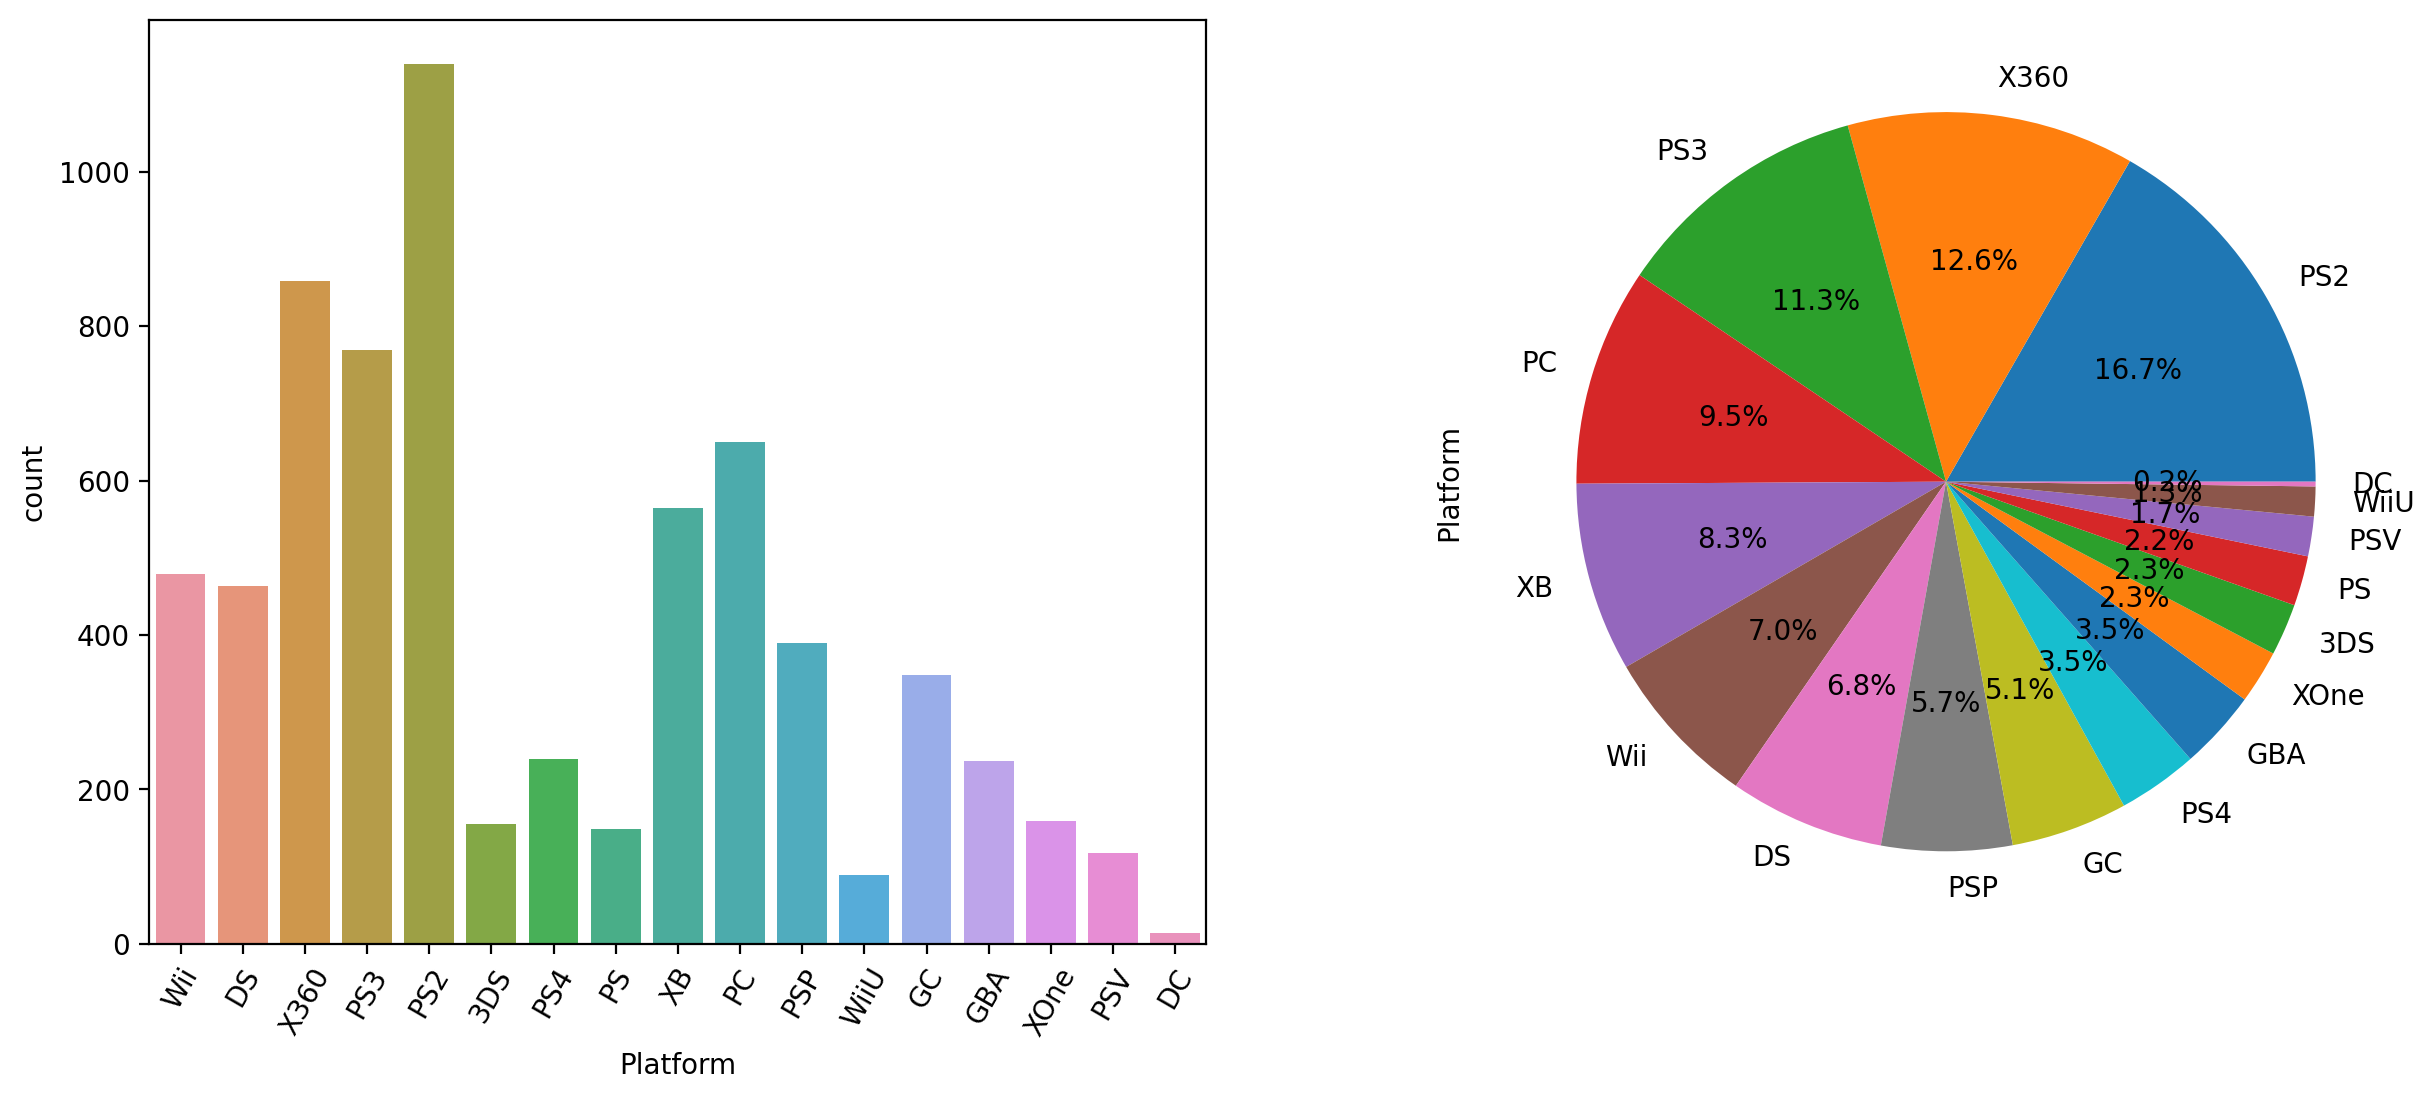

In [124]:
# Subplotting the dataset to see if it is unbalanced

fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200)
a = sns.countplot(x = 'Platform', data = games_dfc, ax=ax_position[0])
a = games_dfc['Platform'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1])
ax_position[0].tick_params(axis='x', rotation=60)


In [125]:
# Assigning the independent variable to X and the target to y
X = games_numeric_df
y = games_object_df['Platform']

In [126]:
# applying SMOTE to resample the dataset
X_res, y_res = sm.fit_resample(X, y)

# reassigning the balanced dataset to X,y
X, y = X_res, y_res 

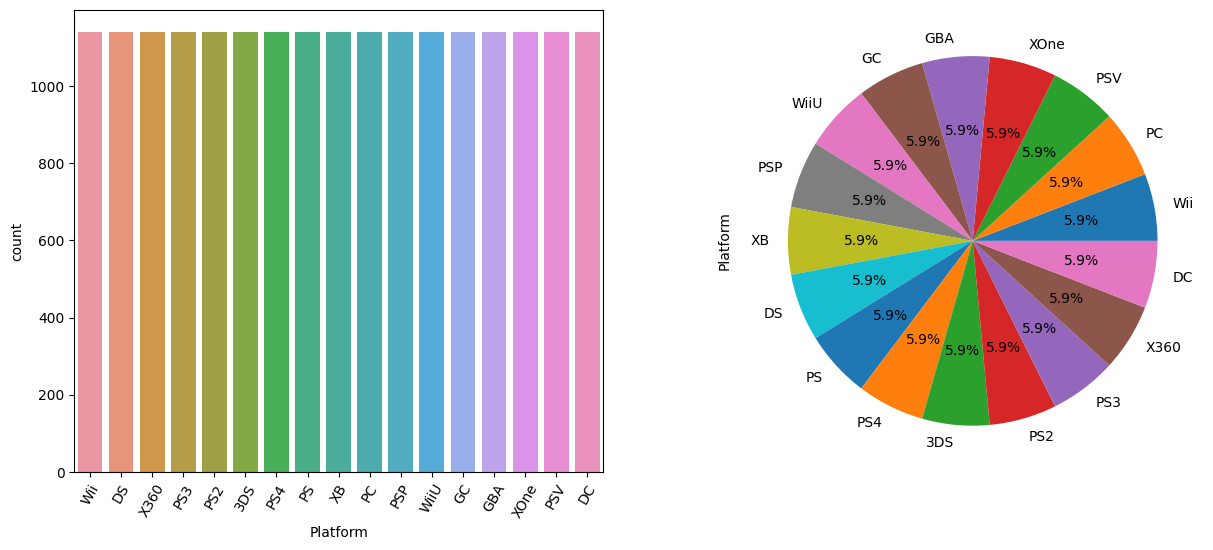

In [127]:
# Subplotting the balanced dataset 
bal_games_dfc = pd.concat([X_res,y_res], axis = 1)
fig, ax=plt.subplots(1,2,figsize=(15,6)) 
a = sns.countplot(x='Platform',data=bal_games_dfc, ax=ax[0])  
a= bal_games_dfc['Platform'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])
ax[0].tick_params(axis='x', rotation=60)


In [128]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the dataset
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# Fitting a model to the dataset using Logistic Regressor
games_classifier = LogisticRegression()

# Training the model using the training set
games_classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [129]:
# Prediciting Platform using the testing set
platform_pred = games_classifier.predict(X_test_scaled)

In [130]:
# Printing the classification report
print(classification_report(y_test,platform_pred))

              precision    recall  f1-score   support

         3DS       0.22      0.18      0.20       220
          DC       0.44      0.89      0.59       242
          DS       0.08      0.04      0.05       229
         GBA       0.11      0.17      0.13       214
          GC       0.13      0.08      0.09       199
          PC       0.37      0.30      0.33       216
          PS       0.23      0.46      0.30       226
         PS2       0.21      0.18      0.19       224
         PS3       0.24      0.07      0.11       242
         PS4       0.37      0.16      0.22       232
         PSP       0.09      0.00      0.01       241
         PSV       0.25      0.00      0.01       247
         Wii       0.16      0.22      0.19       235
        WiiU       0.30      0.03      0.06       226
        X360       0.23      0.54      0.32       230
          XB       0.14      0.21      0.17       220
        XOne       0.26      0.47      0.33       233

    accuracy              

In [131]:
# Printing the confusion matrix
print(confusion_matrix(y_test, platform_pred))

[[ 40   6  13  21   7   5  21   4   2   1   1   0  15   4  48  15  17]
 [  0 216   0   0   0   0  15   0   0   0   0   0   0   0   0   0  11]
 [ 37   5   9  27   7   6  20  18   9   0   2   0  26   1  13  22  27]
 [  5  36   1  36  17   4  47  13   0   0   0   0  20   0   2  14  19]
 [ 10  34   6  29  15   1  21  16   1   0   0   0  17   0   7  28  14]
 [  0  16   8  15   7  64  10   2   2  14   0   2   5   1  10  23  37]
 [  0  63   3  25   1   0 103   0   0   0   0   0  21   0   0   0  10]
 [  5  32   6  24   3   3  17  41   2   1   0   0  29   0  19  27  15]
 [ 14  10   8   6   2  12  10  12  18  17   0   1  18   3  65  13  33]
 [  8   5   5  10   3  16   7   2   9  36   0   0   8   2  66  24  31]
 [ 14   3  16  19  14   8  26  26  12   0   1   0  25   0  19  32  26]
 [ 13  13   8  31  16  10  57  12   0   6   2   1   3   0  45  28   2]
 [ 10   8   9  33   6   0  20  24   3   0   1   0  51   4  25  24  17]
 [ 19   8   7  21   3  10  45   0   0   6   3   0  25   7  41   8  23]
 [  3 

#### Using Platform as the target variable to classify the dataset with K Neighbors Classifier

In [132]:
# Fitting a model to the dataset using K Neighbors Classifier
games_classifier = KNeighborsClassifier()

# Training the model using the training set
games_classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [133]:
# Predicitng Platform using the testing set
platform_pred = games_classifier.predict(X_test_scaled)

In [134]:
# Printing the classification report
print(classification_report(y_test,platform_pred))

              precision    recall  f1-score   support

         3DS       0.49      0.81      0.61       220
          DC       0.95      1.00      0.98       242
          DS       0.32      0.45      0.38       229
         GBA       0.47      0.63      0.54       214
          GC       0.40      0.49      0.44       199
          PC       0.52      0.42      0.47       216
          PS       0.71      0.84      0.77       226
         PS2       0.23      0.10      0.14       224
         PS3       0.32      0.26      0.28       242
         PS4       0.47      0.53      0.49       232
         PSP       0.44      0.35      0.39       241
         PSV       0.63      0.69      0.66       247
         Wii       0.43      0.31      0.36       235
        WiiU       0.65      0.71      0.68       226
        X360       0.40      0.27      0.32       230
          XB       0.29      0.19      0.23       220
        XOne       0.61      0.65      0.63       233

    accuracy              

In [135]:
# Printing the confusion matrix
print(confusion_matrix(y_test, platform_pred))

[[179   0   1   4   1   2   6   1   1   4   3   2   3   3   2   2   6]
 [  0 242   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 22   0 102  12  13   2   2   5  17   5   9   3   8   3   8  14   4]
 [ 11   4  14 134  10   5   8   3   1   3   4   2   5   1   1   4   4]
 [  7   0  19  13  98   3   6   5   2   0  10   5   8   8   2   5   8]
 [ 10   1  13   7   9  91   1   4   6  22   8   8   6   6   3   6  15]
 [  4   2  10   7   2   1 189   1   0   0   0   1   2   2   1   1   3]
 [ 14   0  23  26  30   5  14  23   9   7   9   8  18   0   9  28   1]
 [ 17   1  17   8  12   9   2   6  62  26   9  16   9  10  19   7  12]
 [ 13   2   7   2   8   8   3   6  18 122   4   8   4   5  11   4   7]
 [ 14   0  35   8  12   8   7  10  14  10  85   8   5  12   5   4   4]
 [ 17   2   4  12   0   8   7   1   2   3   4 170   2   3   5   1   6]
 [ 11   0  20  16  14   5   8  10  10   7  18  10  73  10   7  13   3]
 [  8   0   6   2   8   4   4   1   2  12   2   4   3 160   1   2   7]
 [ 14 

#### Using Platform as the target variable to classify the dataset with Naive Bayes

In [136]:
# Fitting a model to the dataset using Naive Bayes
games_classifier = GaussianNB()

# Training the model using the training set
games_classifier.fit(X_train_scaled,y_train)

GaussianNB()

In [137]:
# Prediciting Platform using the testing set
platform_pred = games_classifier.predict(X_test_scaled)

In [138]:
# Printing the classification report
print(classification_report(y_test,platform_pred))

              precision    recall  f1-score   support

         3DS       0.24      0.05      0.08       220
          DC       0.58      0.88      0.70       242
          DS       0.38      0.02      0.04       229
         GBA       0.11      0.07      0.09       214
          GC       0.21      0.06      0.09       199
          PC       0.64      0.33      0.44       216
          PS       0.72      0.18      0.29       226
         PS2       0.47      0.04      0.07       224
         PS3       0.34      0.04      0.07       242
         PS4       0.45      0.12      0.20       232
         PSP       0.36      0.13      0.19       241
         PSV       0.23      0.60      0.33       247
         Wii       0.16      0.05      0.08       235
        WiiU       0.32      0.16      0.21       226
        X360       0.30      0.11      0.16       230
          XB       0.11      0.87      0.20       220
        XOne       0.25      0.27      0.26       233

    accuracy              

In [139]:
# Printing the confusion matrix
print(confusion_matrix(y_test, platform_pred))

[[ 10   8   0  16   9   0   0   0   1   0   7  91   6  20   0  51   1]
 [  0 214   0   0  11   0   7   0   0   0   0   0   0   0   0  10   0]
 [ 10   5   5  11   9   0   1   1   0   0  10  25   8   5   2 131   6]
 [  2  23   2  16   3   0   5   1   0   0   0   8   3   1   0 147   3]
 [  2  27   2   4  12   0   0   0   0   0   1   3   4   7   1 136   0]
 [  0  14   0   0   0  72   0   0   0   5   0  32   1   0   2  90   0]
 [  0   9   0  42   0   0  41   0   0   0   1   9  17   0   0 100   7]
 [  2   6   2  14   0   9   1   9   1   0  16  15   5   3   5 100  36]
 [  3   1   0   7   2   7   0   2  10  17   9  64   6  10  11  70  23]
 [  0   2   0   0   0   4   0   0   9  29   2  77   2   8  12  59  28]
 [  5   7   1  12   1   1   0   4   1   2  31  52   2   5   1 109   7]
 [  0  28   0   1   6   2   0   0   0   3   0 147   0  10   1  46   3]
 [  3   2   1  13   2   6   2   2   0   0   7  24  12   4   3 129  25]
 [  4   3   0  12   1   1   0   0   5   1   1  50   8  36   0 103   1]
 [  0 

#### Using Platform as the target variable to classify the dataset with Support Vector Machine

In [140]:
# Fitting a model to the dataset using Support Vector Machine
games_classifier = SVC()

# Training the model using the training set
games_classifier.fit(X_train_scaled,y_train)

SVC()

In [141]:
# Predicitong Platform using the testing set
platform_pred = games_classifier.predict(X_test_scaled)

In [142]:
# Printing the classification report
print(classification_report(y_test,platform_pred))

              precision    recall  f1-score   support

         3DS       0.23      0.22      0.23       220
          DC       0.57      0.93      0.71       242
          DS       0.16      0.14      0.15       229
         GBA       0.14      0.20      0.16       214
          GC       0.09      0.08      0.09       199
          PC       0.59      0.27      0.37       216
          PS       0.31      0.51      0.39       226
         PS2       0.28      0.12      0.17       224
         PS3       0.21      0.19      0.20       242
         PS4       0.62      0.16      0.25       232
         PSP       0.12      0.19      0.14       241
         PSV       0.00      0.00      0.00       247
         Wii       0.18      0.17      0.17       235
        WiiU       0.33      0.20      0.25       226
        X360       0.28      0.51      0.36       230
          XB       0.18      0.18      0.18       220
        XOne       0.30      0.47      0.37       233

    accuracy              

In [143]:
# Printing the confusion matrix
print(confusion_matrix(y_test, platform_pred))

[[ 49   4  13  19  10   0  11   4  13   0  25   0  12   9  33   7  11]
 [  0 225   0   0   0   0  17   0   0   0   0   0   0   0   0   0   0]
 [ 24   1  31  17  10   3   9   6  20   0  31   0  24   6   8  19  20]
 [  8  27   6  42  21   0  41   6   2   0  10   0  18   7   0  11  15]
 [  8  22  18  26  16   0  15  13   3   0  26   0  12   3   5  23   9]
 [ 10   9  14  10  14  58   6   0   7  12  17   0   1   3  10  15  30]
 [  0  40  12  37   0   0 116   0   0   0   1   0  10   3   0   0   7]
 [  9  21  10  24  18   1  12  27   8   0  28   0  19   2  13  23   9]
 [ 18   8  10   4   5   6   3   1  46   3  27   0  14  14  50   9  24]
 [  3   3   4   6   8   7   4   0  35  37  21   0  10   8  53   9  24]
 [ 13   2  16  11  22   1  19  12  18   0  45   0  16   6  16  23  21]
 [  7   7   8  30  11   5  47   0   9   0  59   0   1  13  33  14   3]
 [ 15   5  18  21   8   0  15  12   6   0  34   0  40   5  21  20  15]
 [ 23   3  13  18   3   3  27   0   5   0  16   0  10  45  21   6  33]
 [  8 

#### Using Platform as the target variable to classify the dataset with Decision Tree Classifier

In [144]:
# Converting the target variable to numerical using label encoding
label_encoder = LabelEncoder()
games_df_Platform = label_encoder.fit_transform(games_df['Platform'])

X = games_numeric_df
y = games_df_Platform

games_classifier = DecisionTreeClassifier()

# Defining the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation
scores = cross_val_score(games_classifier, X, y, cv=cv)

# Printing the mean and standard deviation of scores
print('Cross-validation scores: ', scores)
print('Mean score: ', scores.mean())
print('Standard deviation: ', scores.std())

Cross-validation scores:  [0.46666667 0.44835165 0.46300366 0.45128205 0.45274725]
Mean score:  0.4564102564102564
Standard deviation:  0.007117923986221902


In [145]:
# Fit classifier on entire dataset
games_classifier.fit(X, y)

DecisionTreeClassifier()

In [146]:
# Making predictions on the testing data
platform_pred = games_classifier.predict(X)

In [147]:
# Printing the classification report
print('Classification Report:')
print(classification_report(y, platform_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00       464
           3       1.00      1.00      1.00       237
           4       1.00      1.00      1.00       348
           5       1.00      1.00      1.00       651
           6       1.00      1.00      1.00       150
           7       1.00      1.00      1.00      1140
           8       1.00      1.00      1.00       769
           9       1.00      1.00      1.00       239
          10       1.00      1.00      1.00       390
          11       1.00      1.00      1.00       118
          12       1.00      1.00      1.00       479
          13       1.00      1.00      1.00        89
          14       1.00      1.00      1.00       858
          15       1.00      1.00      1.00       565
          16       1.00      1.00      1.00       159

   

In [148]:
# Printing the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y, platform_pred))

Confusion Matrix:
[[ 155    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0   14    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0  464    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0  237    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0  348    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0  651    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0  150    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0 1140    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0  769    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0  239    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  390    0    0    0
     0    

#### Using Genre as the target variable to classify the dataset with a logistic regressor

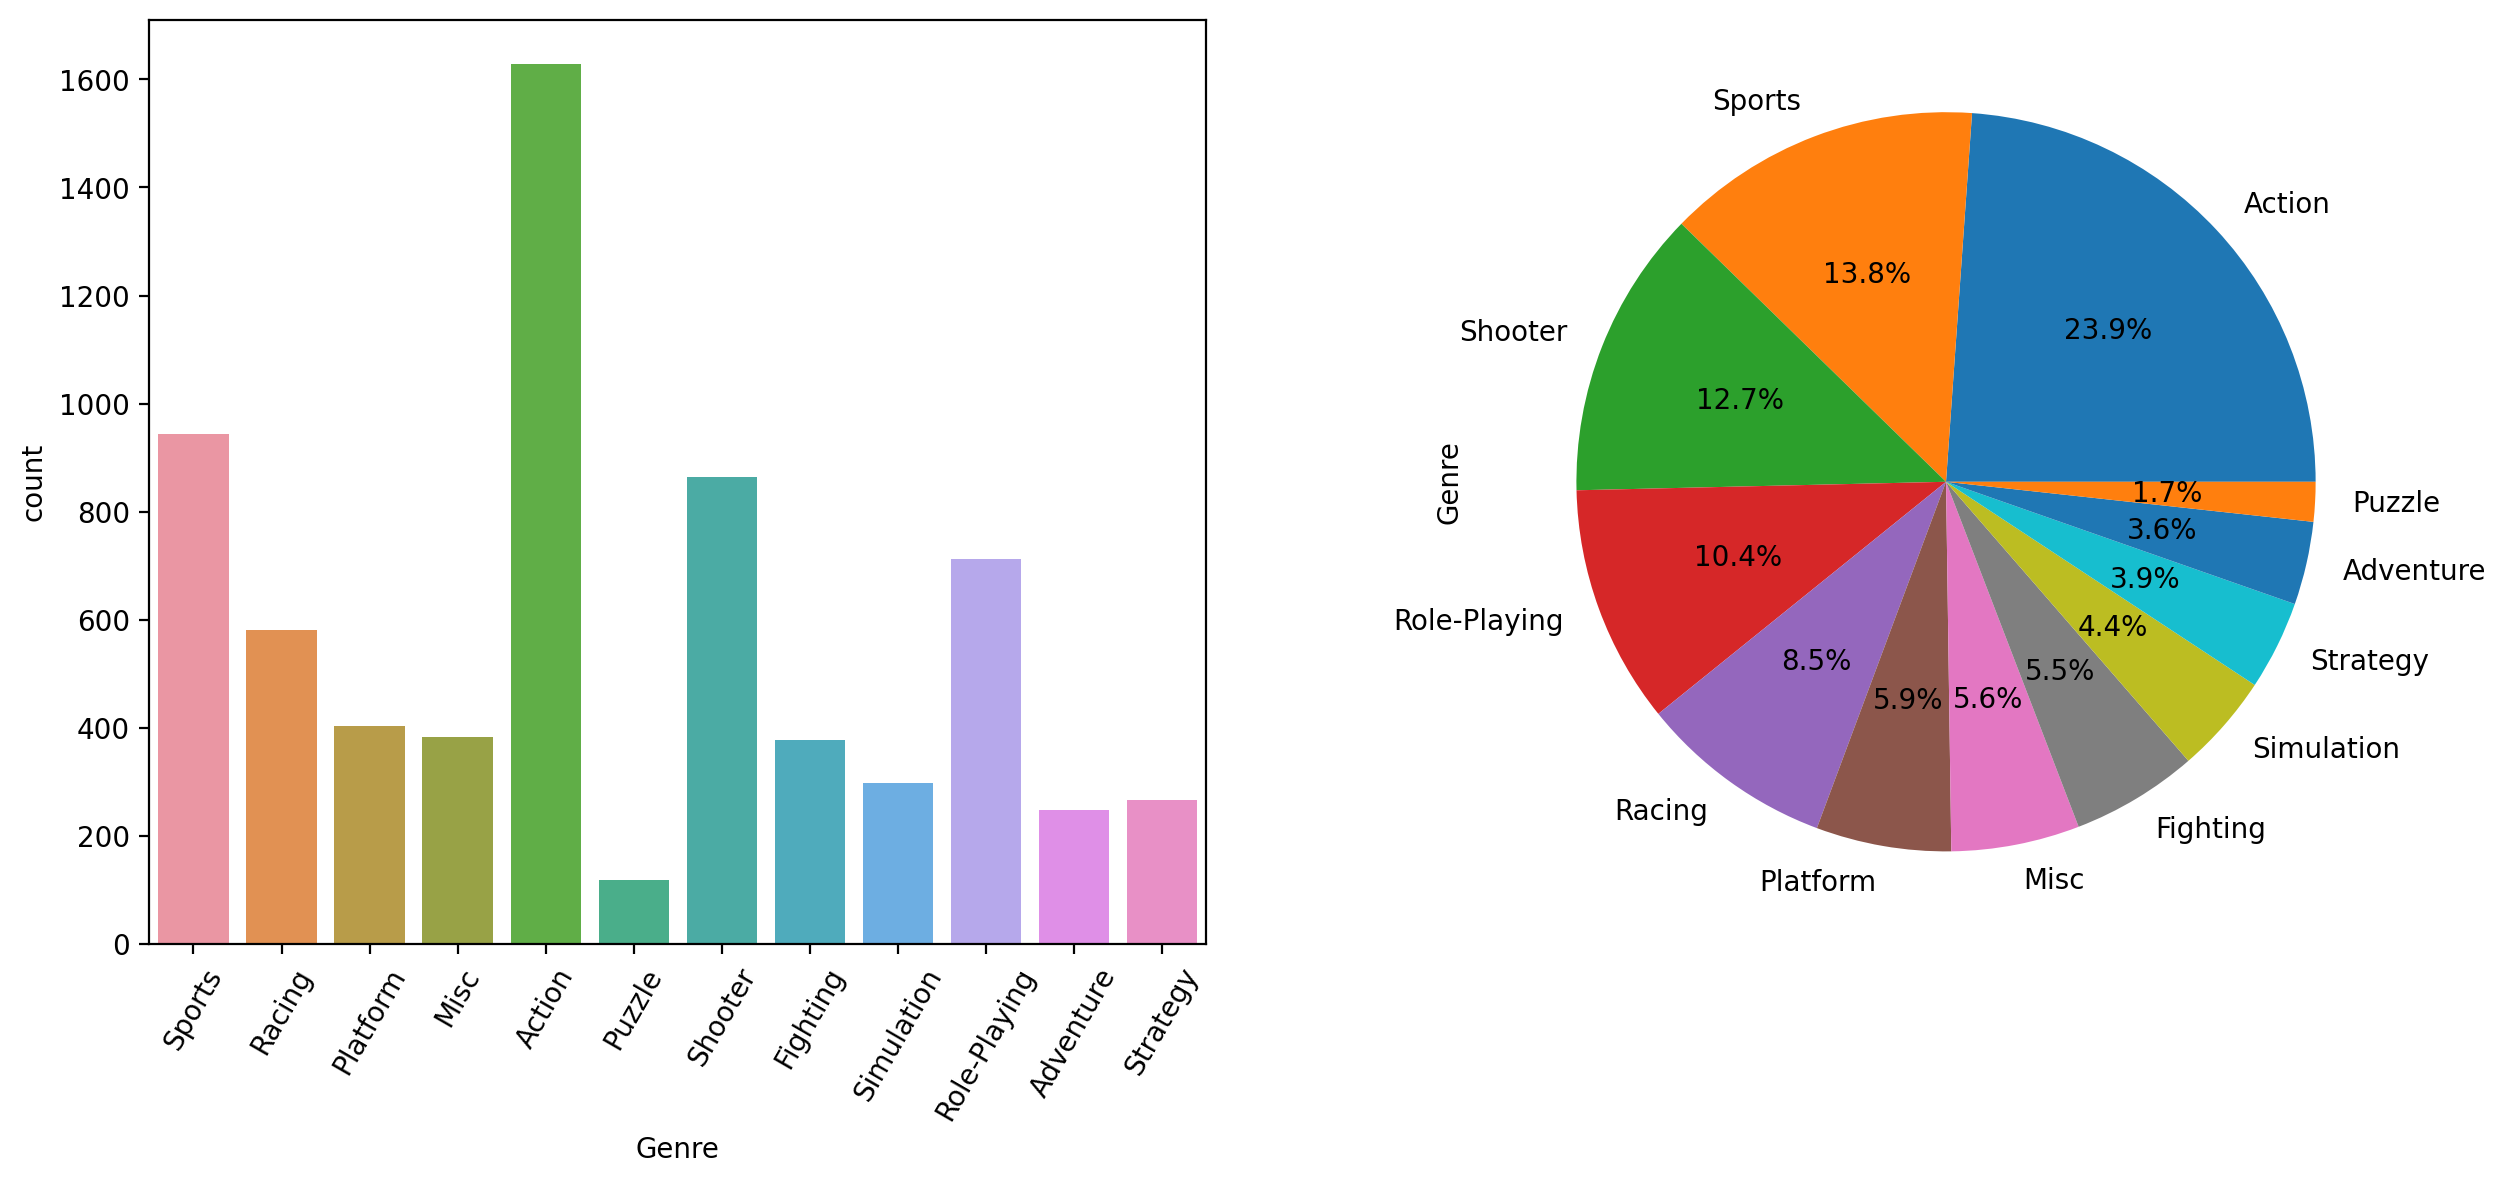

In [149]:
# Subplotting the dataset to see if it is unbalanced

fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200)
a = sns.countplot(x = 'Genre', data = games_dfc, ax=ax_position[0])
a = games_dfc['Genre'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1])
ax_position[0].tick_params(axis='x', rotation=60)


In [150]:
# Assigning the independent variable to X and the target to y
X = games_numeric_df
y = games_object_df['Genre']

# reassigning the balanced dataset to X,y
X_res, y_res = sm.fit_resample(X, y) 
X, y = X_res, y_res

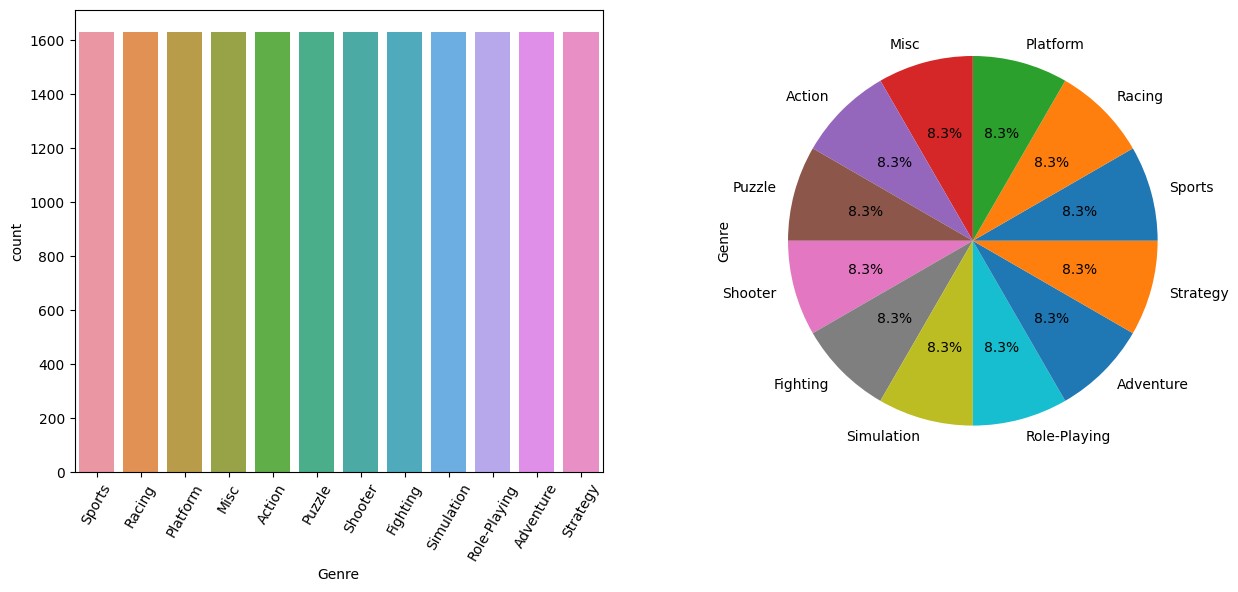

In [151]:
# Plotting the balanced dataset

bal_games_dfc = pd.concat([X_res,y_res], axis = 1)
fig, ax=plt.subplots(1,2,figsize=(15,6))
a = sns.countplot(x='Genre',data=bal_games_dfc, ax=ax[0])
a= bal_games_dfc['Genre'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])
ax[0].tick_params(axis='x', rotation=60)


In [152]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the dataset
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# Fitting a model to the dataset using Logistic Regressor
games_classifier = LogisticRegression()

# Training the dataset using the training set
games_classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [153]:
# Predicting Genre using the testing set
genre_pred = games_classifier.predict(X_test_scaled)

In [154]:
# Printing the classification report
print(classification_report(y_test,genre_pred))

              precision    recall  f1-score   support

      Action       0.13      0.05      0.07       309
   Adventure       0.16      0.29      0.20       358
    Fighting       0.17      0.02      0.03       331
        Misc       0.15      0.16      0.15       311
    Platform       0.19      0.07      0.10       334
      Puzzle       0.35      0.10      0.15       326
      Racing       0.28      0.02      0.04       322
Role-Playing       0.25      0.22      0.23       344
     Shooter       0.19      0.31      0.23       310
  Simulation       0.15      0.17      0.16       323
      Sports       0.19      0.55      0.29       317
    Strategy       0.19      0.28      0.23       327

    accuracy                           0.19      3912
   macro avg       0.20      0.19      0.16      3912
weighted avg       0.20      0.19      0.16      3912



In [155]:
# Printing the confusion matrix
print(confusion_matrix(y_test, genre_pred))

[[ 15  59   5  29   4   5   4  23  61  24  49  31]
 [  7 103   3  39   6   9   0  22  35  29  63  42]
 [ 25  57   5  27  25   6   3  17  37  22  63  44]
 [  6  53   2  50   5   5   1   9  46  23  93  18]
 [  8  45   3  29  22   2   2  42  33  53  71  24]
 [  5  45   1  20   1  32   0  46  23  29  74  50]
 [  6  48   0  29  18   3   7   7  46  30  94  34]
 [ 13  62   1  13   3  13   1  74  48  34  41  41]
 [ 14  52   2  18   3   1   3   6  95   9  43  64]
 [ 11  29   3  39  20   7   1  26  24  55  75  33]
 [  3  32   5  27   8   3   1   4  16  21 174  23]
 [  4  65   0  16   1   6   2  16  41  28  55  93]]


#### Using Genre as the target variable to classify the dataset with K Neighbors Classifier

In [156]:
# Fitting a model to the dataset using K Neighbors classifier
games_classifier = KNeighborsClassifier()

# Training the model using the training set
games_classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [157]:
# Predicitng Genre using the testing set
genre_pred = games_classifier.predict(X_test_scaled)

In [158]:
# Printing the classification report
print(classification_report(y_test,genre_pred))

              precision    recall  f1-score   support

      Action       0.20      0.17      0.18       309
   Adventure       0.51      0.70      0.59       358
    Fighting       0.42      0.56      0.48       331
        Misc       0.46      0.58      0.51       311
    Platform       0.52      0.51      0.52       334
      Puzzle       0.60      0.83      0.69       326
      Racing       0.47      0.38      0.42       322
Role-Playing       0.49      0.34      0.40       344
     Shooter       0.39      0.27      0.32       310
  Simulation       0.57      0.48      0.52       323
      Sports       0.41      0.28      0.34       317
    Strategy       0.57      0.58      0.57       327

    accuracy                           0.48      3912
   macro avg       0.47      0.47      0.46      3912
weighted avg       0.47      0.48      0.47      3912



In [159]:
# Printing the confusion matrix
print(confusion_matrix(y_test, genre_pred))

[[ 53  18  37  22  26  29  27  17  32  14  17  17]
 [ 16 250  10  16  11   7  12   4   4   9   4  15]
 [ 20  10 187  13  15  16   9  12  14  10  12  13]
 [ 22  20  18 179   6   9   9   6   9  12   9  12]
 [ 10  27  28  18 172  10  10  11   9  13  16  10]
 [  9  10   9   9   4 269   3   2   3   2   3   3]
 [ 19  21  28  21  24  22 123  10  11   7  21  15]
 [ 24  33  27  22  22  28  20 117  14   9   9  19]
 [ 35  26  28  20  12  16  15  21  84  16  17  20]
 [ 25  17  23  20  11  17  10  12  14 155  10   9]
 [ 25  33  32  37  13  12  16  16  11  18  90  14]
 [ 12  22  17  10  12  14   6  10  12   9  12 191]]


#### Using Genre as the target variable to classify the dataset with Naive Bayes

In [160]:
# Fitting a model to the dataset using Naive Bayes
games_classifier = GaussianNB()

# Training the model using the training set
games_classifier.fit(X_train_scaled,y_train)

GaussianNB()

In [161]:
# Prediciting Genre using the testing set
genre_pred = games_classifier.predict(X_test_scaled)

In [162]:
# Printing the classification report
print(classification_report(y_test,genre_pred))

              precision    recall  f1-score   support

      Action       0.23      0.01      0.02       309
   Adventure       0.13      0.40      0.19       358
    Fighting       0.14      0.13      0.13       331
        Misc       0.23      0.07      0.10       311
    Platform       0.27      0.05      0.08       334
      Puzzle       0.13      0.10      0.11       326
      Racing       0.21      0.02      0.03       322
Role-Playing       0.42      0.03      0.05       344
     Shooter       0.30      0.14      0.19       310
  Simulation       0.00      0.00      0.00       323
      Sports       0.19      0.02      0.04       317
    Strategy       0.12      0.68      0.21       327

    accuracy                           0.14      3912
   macro avg       0.20      0.14      0.10      3912
weighted avg       0.20      0.14      0.10      3912



In [163]:
# Printing the confusion matrix
print(confusion_matrix(y_test, genre_pred))

[[  3 102  20   5   4  20   2   4  11   0   3 135]
 [  0 143   8   0   0   9   0   0   9   0   0 189]
 [  0 111  43   3   4  14   8   0  10   0   3 135]
 [  0 106  33  21   0  21   0   0   6   3  12 109]
 [  1  85  31  11  16  30   4   2  12   3   2 137]
 [  0  81  29   9  15  31   0   2   1   0   0 158]
 [  2  89  27  14   2  21   6   0   5   1   6 149]
 [  1 100  28   1  13  23   1  10  20   2   0 145]
 [  3  78  27   3   0   6   2   1  44   0   4 142]
 [  1  77  29  16   5  35   1   2   6   0   0 151]
 [  2  73  39   9   0  22   4   0   7   0   7 154]
 [  0  80   2   0   0   3   0   3  15   1   0 223]]


#### Using Genre as the target variable to classify the dataset with Support Vector Machine

In [164]:
# Fitting a model to the dataset using Support Vector Machine
games_classifier = SVC()

# Training the model using the training set
games_classifier.fit(X_train_scaled,y_train)

SVC()

In [165]:
# Predicitng Genre using the testing set
genre_pred = games_classifier.predict(X_test_scaled)

In [166]:
# Printing the classification report
print(classification_report(y_test,genre_pred))

              precision    recall  f1-score   support

      Action       0.16      0.06      0.09       309
   Adventure       0.17      0.34      0.22       358
    Fighting       0.13      0.05      0.07       331
        Misc       0.16      0.15      0.15       311
    Platform       0.43      0.04      0.07       334
      Puzzle       0.29      0.25      0.27       326
      Racing       0.10      0.04      0.06       322
Role-Playing       0.36      0.12      0.19       344
     Shooter       0.21      0.30      0.25       310
  Simulation       0.15      0.28      0.19       323
      Sports       0.24      0.42      0.30       317
    Strategy       0.21      0.29      0.24       327

    accuracy                           0.20      3912
   macro avg       0.22      0.20      0.18      3912
weighted avg       0.22      0.20      0.18      3912



In [167]:
# Printing the confusion matrix
print(confusion_matrix(y_test, genre_pred))

[[ 20  67  14  23   2  14  12  10  57  30  29  31]
 [ 13 122   2  30   1  15  14  10  37  37  28  49]
 [ 26  57  17  29   2  19   8   6  36  59  36  36]
 [  7  70  14  47   0  17   5   7  36  41  51  16]
 [ 11  63   7  20  13  10  17  10  34  89  31  29]
 [  4  48  11  26   0  80  17  10  20  34  40  36]
 [  4  63  15  24   7  13  14   1  35  52  70  24]
 [ 13  57  10  11   1  34   6  43  52  52  22  43]
 [ 17  58   5  13   1  13   8   1  93  18  31  52]
 [  8  32  20  33   0  12  18  14  18  89  51  28]
 [  1  39  12  27   3  19   9   4  12  41 133  17]
 [  3  51   5  20   0  31  15   2  17  50  37  96]]


#### Using Genre as the target variable to classify the dataset with Decision Tree Classifier

In [168]:
# Converting the  target variable to numerical using label encoding
label_encoder = LabelEncoder()
games_df_Genre = label_encoder.fit_transform(games_df['Genre'])

X = games_numeric_df
y = games_df_Genre

games_classifier = DecisionTreeClassifier()

# Defining the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation
scores = cross_val_score(games_classifier, X, y, cv=cv)

# Printing the mean and standard deviation of scores
print('Cross-validation scores: ', scores)
print('Mean score: ', scores.mean())
print('Standard deviation: ', scores.std())

Cross-validation scores:  [0.23736264 0.23956044 0.23589744 0.21831502 0.22783883]
Mean score:  0.23179487179487177
Standard deviation:  0.007816544274490338


In [169]:
# Fitting the classifier on the dataset
games_classifier.fit(X, y)

DecisionTreeClassifier()

In [170]:
# Making predictions on testing data
genre_pred = games_classifier.predict(X)

In [171]:
# Printing the classification report
print('Classification Report:')
print(classification_report(y, genre_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      1.00      1.00       248
           2       1.00      1.00      1.00       378
           3       1.00      1.00      1.00       384
           4       1.00      1.00      1.00       403
           5       1.00      1.00      1.00       118
           6       1.00      1.00      1.00       581
           7       1.00      1.00      1.00       712
           8       1.00      1.00      1.00       864
           9       1.00      1.00      1.00       297
          10       1.00      1.00      1.00       943
          11       1.00      1.00      1.00       267

    accuracy                           1.00      6825
   macro avg       1.00      1.00      1.00      6825
weighted avg       1.00      1.00      1.00      6825



In [172]:
# Printing confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y, genre_pred))

Confusion Matrix:
[[1630    0    0    0    0    0    0    0    0    0    0    0]
 [   0  248    0    0    0    0    0    0    0    0    0    0]
 [   0    0  378    0    0    0    0    0    0    0    0    0]
 [   0    0    0  384    0    0    0    0    0    0    0    0]
 [   0    0    0    0  403    0    0    0    0    0    0    0]
 [   0    0    0    0    0  118    0    0    0    0    0    0]
 [   0    0    0    0    0    0  581    0    0    0    0    0]
 [   0    0    0    0    0    0    0  712    0    0    0    0]
 [   0    0    0    0    0    0    0    0  864    0    0    0]
 [   0    0    0    0    0    0    0    0    0  297    0    0]
 [   0    0    0    0    0    0    0    0    0    0  943    0]
 [   0    0    0    0    0    0    0    0    0    0    0  267]]


### E. How did you check whether your models did not overfit?

In [173]:
# Answered in the report

### F. Can your classification models be deployed in practice based on their performances?

In [174]:
# Answered in the report

### G. Using a relevant categorical variable and other relevant non-categorical variables to form groups at each        instance

In [175]:
""" Importing the required libraries to build and evaluate 
    unsupervised machine learning models using
    external and internal measures.
"""

from sklearn.metrics import v_measure_score 
from sklearn.metrics import adjusted_mutual_info_score 
from sklearn.metrics import adjusted_rand_score 
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score

### Using Rating

In [176]:
""" Using all the relevant non-categorical variables
    (All the numerical columns in the dataset) 
    and Rating as the ground truth label.
"""
relevant_games_num = games_df.select_dtypes(exclude = "object")

# Getting the true class labels
y_true = games_df['Rating']

# Preprocessing the data using standard scaler
scaler = StandardScaler()
scaled_relevant_games_num = scaler.fit_transform(relevant_games_num)
scaled_relevant_games_num

array([[-3.41200963e-01,  4.23497414e+01,  4.17936306e+01, ...,
         1.14805929e+00,  5.65601589e-01,  2.50734237e-01],
       [ 1.33752448e-01,  1.58020141e+01,  1.82224385e+01, ...,
         2.29253613e+00,  7.73958628e-01,  9.09586046e-01],
       [ 3.71229153e-01,  1.57296488e+01,  1.55597668e+01, ...,
         2.29253613e+00,  5.65601589e-01,  2.94145083e-02],
       ...,
       [ 1.55861268e+00, -4.07813115e-01, -3.28962725e-01, ...,
        -4.64612627e-01,  2.87792205e-01,  4.03955588e-01],
       [ 8.46182563e-01, -3.97475215e-01, -3.43512844e-01, ...,
        -8.80786024e-01, -9.62350024e-01, -2.24251950e-01],
       [ 8.46182563e-01, -4.07813115e-01, -3.28962725e-01, ...,
        -8.80786024e-01,  9.98282073e-03, -2.75325734e-01]])

#### Using K-means Partitional Clustering Technique

In [177]:
from sklearn.cluster import KMeans 

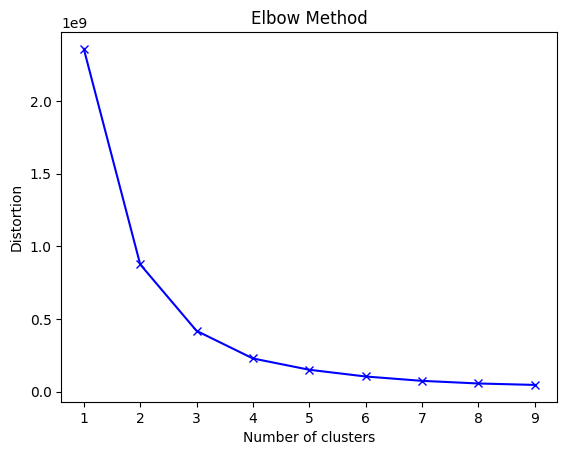

In [178]:
# Using the elbow method to onbtain the satisfactory number of clusters

distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(relevant_games_num)
    distortions.append(kmeans.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [179]:
""" From the above plot, 3 would be the suitable number of clusters
    because it drops directly on the elbow
""" 

k=3

# Fitting the k-means algorithm
kmeans = KMeans(n_clusters=k, random_state=42)
C_labels = kmeans.fit_predict(scaled_relevant_games_num)
C_labels

array([1, 1, 1, ..., 0, 2, 2], dtype=int32)

In [180]:
# Evaluating and printing the model performance

#Calculating the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V_measure Score: {v_measure}')

# Calculating the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index}')

# Calculating the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score}\n')

# Calculating the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_relevant_games_num, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score}')

# Calculating the Silhouette coefficient
s_score = silhouette_score(scaled_relevant_games_num, C_labels)
print(f'Silhouette Coefficient: {s_score}')

# Calculating the Calinski Score
c_score = calinski_harabasz_score(scaled_relevant_games_num, C_labels)
print(f'Calinski Harabasz Score: {c_score}')

External Evaluation Measures
********************************
V_measure Score: 0.010486841901577434
Rand Index Score: 0.007295349075832706
Mutual Information Score: 0.009753854747873013

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.4392990529440777
Silhouette Coefficient: 0.19889938229628373
Calinski Harabasz Score: 1596.0816495571491


#### Using Hierarchical Clustering Technique (Agglomerative)

In [181]:
from sklearn.cluster import AgglomerativeClustering

In [182]:
agg_model = AgglomerativeClustering(n_clusters=k,linkage='single')
agg_labels=agg_model.fit_predict(scaled_relevant_games_num)
agg_labels

array([1, 2, 2, ..., 2, 2, 2])

In [183]:
# Evaluating and printing the model performance

#Calculating the v-measure score
v_measure = v_measure_score(y_true, agg_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V_measure Score: {v_measure}')

# Calculating the Rand index score
rand_index = adjusted_rand_score(y_true, agg_labels)
print(f'Rand Index Score: {rand_index}')

# Calculating the mutual information score
mi_score = adjusted_mutual_info_score(y_true, agg_labels)
print(f'Mutual Information Score: {mi_score}\n')

# Calculating the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_relevant_games_num, agg_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score}')

# Calculating the Silhouette coefficient
s_score = silhouette_score(scaled_relevant_games_num, agg_labels)
print(f'Silhouette Coefficient: {s_score}')

# Calculating the Calinski Score
c_score = calinski_harabasz_score(scaled_relevant_games_num, agg_labels)
print(f'Calinski Harabasz Score: {c_score}')

External Evaluation Measures
********************************
V_measure Score: 0.0005589060105190716
Rand Index Score: 8.871110637514345e-06
Mutual Information Score: -9.826983455263386e-05

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.21633602657578765
Silhouette Coefficient: 0.9042372648386524
Calinski Harabasz Score: 508.0261094076262


In [184]:
# Plotting the dendogram

agg_model = AgglomerativeClustering(n_clusters=None, distance_threshold=0) 
agg_label=agg_model.fit_predict(scaled_relevant_games_num)
agg_label

array([6143, 5503, 6751, ...,    2,    1,    0])

In [185]:
# Using scipy to plot the hierarchy
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

In [186]:
""" Hierarchy is used to obtain the linkage matrix that contains 
    the distances/relationship between the clusters
"""
matrix_linkage = hierarchy.linkage(agg_model.children_) 
matrix_linkage # distances between the points 

array([[1.06700000e+03, 1.08200000e+03, 1.41421356e+00, 2.00000000e+00],
       [5.35200000e+03, 5.84400000e+03, 1.41421356e+00, 2.00000000e+00],
       [5.39200000e+03, 6.51700000e+03, 1.41421356e+00, 2.00000000e+00],
       ...,
       [1.36390000e+04, 1.36430000e+04, 7.82419964e+02, 6.82000000e+03],
       [1.36420000e+04, 1.36440000e+04, 8.63931710e+02, 6.82300000e+03],
       [6.31900000e+03, 1.36450000e+04, 8.73341285e+02, 6.82400000e+03]])

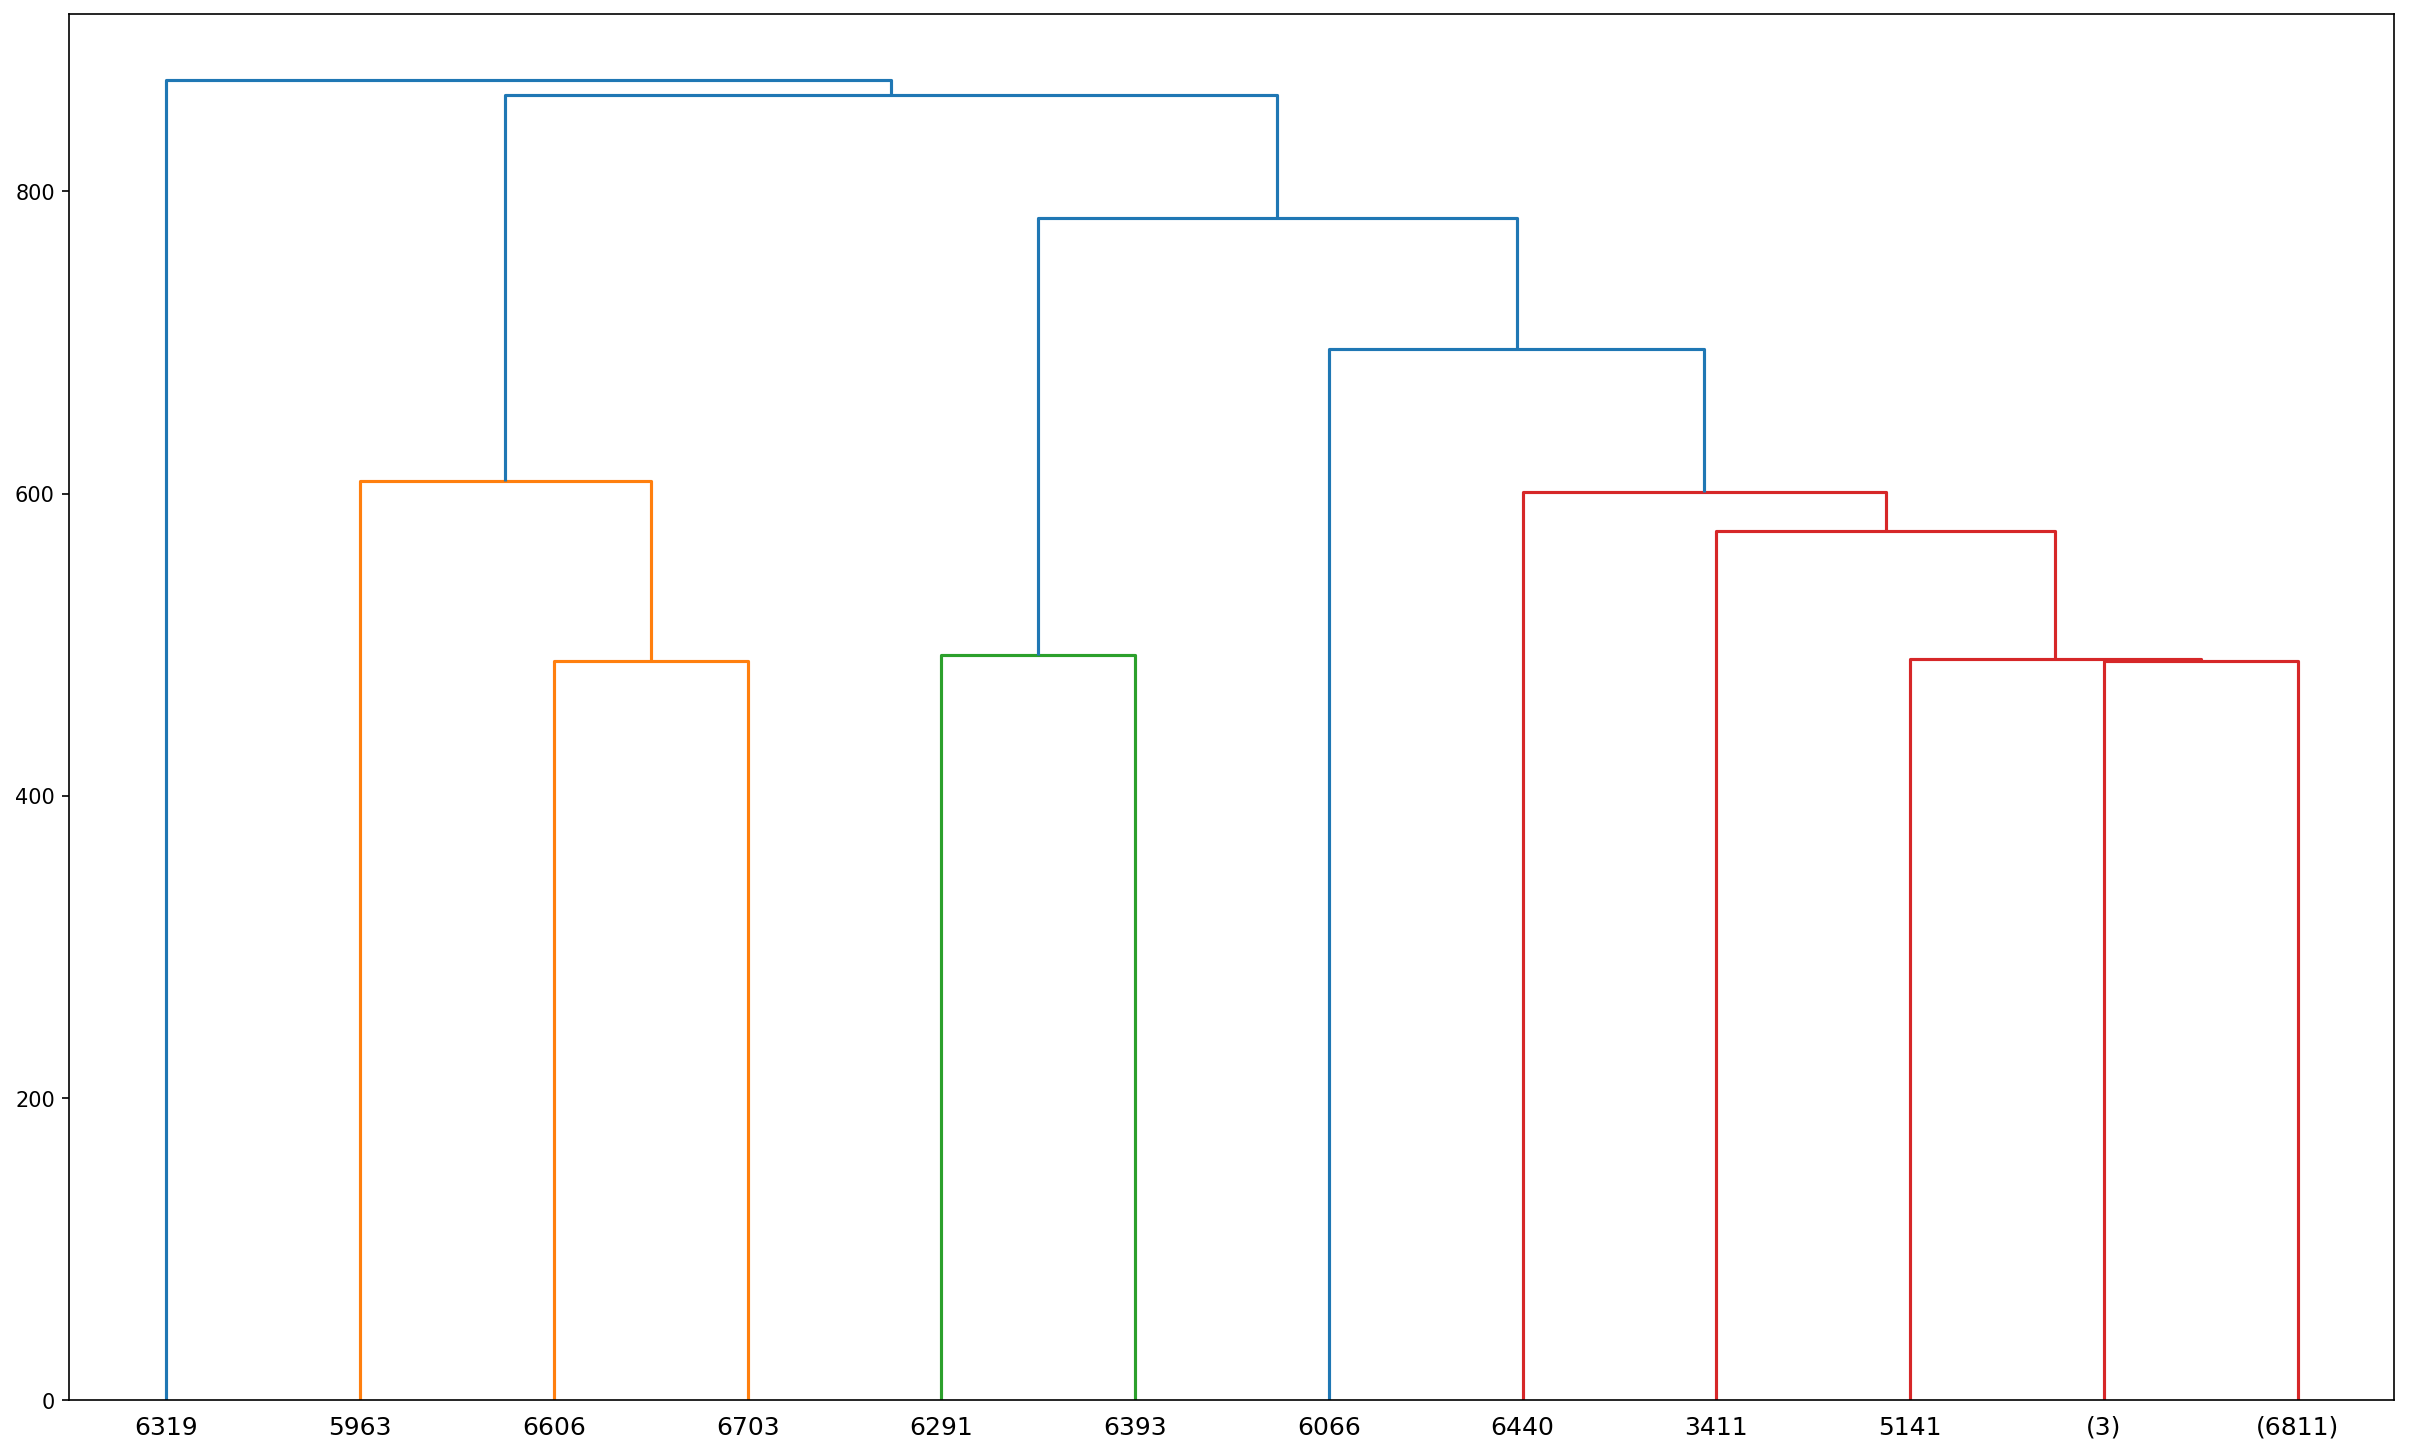

In [187]:
plt.figure(figsize=(20,12), dpi = 150,)
dendrogram(Z=matrix_linkage,truncate_mode= 'level', p= 7);

#### Using DBSCAN

In [188]:
from sklearn.cluster import DBSCAN

In [189]:
# Define the DBSCAN model with epsylum and min_samples parameters
dbscan = DBSCAN(eps=0.4, min_samples=7)

# Fitting the model and predicting the labels
labels = dbscan.fit_predict(scaled_relevant_games_num)

In [190]:
# Evaluating and printing the model performance

#Calculating the v-measure score
v_measure = v_measure_score(y_true, labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V_measure Score: {v_measure}')

# Calculating the Rand index score
rand_index = adjusted_rand_score(y_true, labels)
print(f'Rand Index Score: {rand_index}')

# Calculating the mutual information score
mi_score = adjusted_mutual_info_score(y_true, labels)
print(f'Mutual Information Score: {mi_score}\n')

# Calculating the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_relevant_games_num, labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score}')

# Calculating the Silhouette coefficient
s_score = silhouette_score(scaled_relevant_games_num, labels)
print(f'Silhouette Coefficient: {s_score}')

# Calculating the Calinski Score
c_score = calinski_harabasz_score(scaled_relevant_games_num, labels)
print(f'Calinski Harabasz Score: {c_score}')

External Evaluation Measures
********************************
V_measure Score: 0.013618958094558656
Rand Index Score: 0.0011862392628350352
Mutual Information Score: 0.009005220077492094

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.4856483407887313
Silhouette Coefficient: -0.4027363440449327
Calinski Harabasz Score: 22.481691259837827


#### Trying out 2 clusters using Hierarchical Clustering Technique (Agglomerative)

In [191]:
k = 2

agg_model = AgglomerativeClustering(n_clusters=k,linkage='single')
agg_labels=agg_model.fit_predict(scaled_relevant_games_num)
agg_labels

array([1, 0, 0, ..., 0, 0, 0])

In [192]:
# Evaluating and printing the model performance

#Calculating the v-measure score
v_measure = v_measure_score(y_true, agg_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V_measure Score: {v_measure}')

# Calculating the Rand index score
rand_index = adjusted_rand_score(y_true, agg_labels)
print(f'Rand Index Score: {rand_index}')

# Calculating the mutual information score
mi_score = adjusted_mutual_info_score(y_true, agg_labels)
print(f'Mutual Information Score: {mi_score}\n')

# Calculating the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_relevant_games_num, agg_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score}')

# Calculating the Silhouette coefficient
s_score = silhouette_score(scaled_relevant_games_num, agg_labels)
print(f'Silhouette Coefficient: {s_score}')

# Calculating the Calinski Score
c_score = calinski_harabasz_score(scaled_relevant_games_num, agg_labels)
print(f'Calinski Harabasz Score: {c_score}')

External Evaluation Measures
********************************
V_measure Score: 0.0002608119394069441
Rand Index Score: -2.273921196056416e-05
Mutual Information Score: -3.206628244416855e-05

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.028870996976566157
Silhouette Coefficient: 0.9574369833454115
Calinski Harabasz Score: 706.5764790470132


#### Trying out 4 clusters using Hierarchical Clustering Technique (Agglomerative)

In [193]:
k = 4

agg_model = AgglomerativeClustering(n_clusters=k,linkage='single')
agg_labels=agg_model.fit_predict(scaled_relevant_games_num)
agg_labels

array([3, 0, 0, ..., 0, 0, 0])

In [194]:
# Evaluating and printing the model performance

#Calculating the v-measure score
v_measure = v_measure_score(y_true, agg_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V_measure Score: {v_measure}')

# Calculating the Rand index score
rand_index = adjusted_rand_score(y_true, agg_labels)
print(f'Rand Index Score: {rand_index}')

# Calculating the mutual information score
mi_score = adjusted_mutual_info_score(y_true, agg_labels)
print(f'Mutual Information Score: {mi_score}\n')

# Calculating the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_relevant_games_num, agg_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score}')

# Calculating the Silhouette coefficient
s_score = silhouette_score(scaled_relevant_games_num, agg_labels)
print(f'Silhouette Coefficient: {s_score}')

# Calculating the Calinski Score
c_score = calinski_harabasz_score(scaled_relevant_games_num, agg_labels)
print(f'Calinski Harabasz Score: {c_score}')

External Evaluation Measures
********************************
V_measure Score: 0.0008626564587457916
Rand Index Score: 8.904017608919216e-06
Mutual Information Score: -1.4069787076168528e-05

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.06113832578901626
Silhouette Coefficient: 0.8829997053038238
Calinski Harabasz Score: 343.13178850943603


### Using Platform

In [195]:
""" Using all the relevant non-categorical variables
    (All the numerical columns in the dataset) 
    and Platform as the ground truth label.
"""

y_true = games_df['Platform']


#### Trying out 3 clusters using Hierarchical Clustering Technique (Agglomerative)

In [196]:
k = 3

agg_model = AgglomerativeClustering(n_clusters=k,linkage='single')
agg_labels=agg_model.fit_predict(scaled_relevant_games_num)
agg_labels

array([1, 2, 2, ..., 2, 2, 2])

In [197]:
# Evaluating and printing the model performance

#Calculating the v-measure score
v_measure = v_measure_score(y_true, agg_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V_measure Score: {v_measure}')

# Calculating the Rand index score
rand_index = adjusted_rand_score(y_true, agg_labels)
print(f'Rand Index Score: {rand_index}')

# Calculating the mutual information score
mi_score = adjusted_mutual_info_score(y_true, agg_labels)
print(f'Mutual Information Score: {mi_score}\n')

# Calculating the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_relevant_games_num, agg_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score}')

# Calculating the Silhouette coefficient
s_score = silhouette_score(scaled_relevant_games_num, agg_labels)
print(f'Silhouette Coefficient: {s_score}')

# Calculating the Calinski Score
c_score = calinski_harabasz_score(scaled_relevant_games_num, agg_labels)
print(f'Calinski Harabasz Score: {c_score}')

External Evaluation Measures
********************************
V_measure Score: 0.0007152737291260153
Rand Index Score: -8.230195895429851e-05
Mutual Information Score: -1.852544277041375e-05

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.21633602657578765
Silhouette Coefficient: 0.9042372648386524
Calinski Harabasz Score: 508.0261094076262


#### Trying out 2 clusters using Hierarchical Clustering Technique (Agglomerative)

In [198]:
k = 2

agg_model = AgglomerativeClustering(n_clusters=k,linkage='single')
agg_labels=agg_model.fit_predict(scaled_relevant_games_num)
agg_labels

array([1, 0, 0, ..., 0, 0, 0])

In [199]:
# Evaluating and printing the model performance

#Calculating the v-measure score
v_measure = v_measure_score(y_true, agg_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V_measure Score: {v_measure}')

# Calculating the Rand index score
rand_index = adjusted_rand_score(y_true, agg_labels)
print(f'Rand Index Score: {rand_index}')

# Calculating the mutual information score
mi_score = adjusted_mutual_info_score(y_true, agg_labels)
print(f'Mutual Information Score: {mi_score}\n')

# Calculating the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_relevant_games_num, agg_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score}')

# Calculating the Silhouette coefficient
s_score = silhouette_score(scaled_relevant_games_num, agg_labels)
print(f'Silhouette Coefficient: {s_score}')

# Calculating the Calinski Score
c_score = calinski_harabasz_score(scaled_relevant_games_num, agg_labels)
print(f'Calinski Harabasz Score: {c_score}')

External Evaluation Measures
********************************
V_measure Score: 0.00030505667016681614
Rand Index Score: 1.4224975445150862e-05
Mutual Information Score: 1.2050269852594012e-05

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.028870996976566157
Silhouette Coefficient: 0.9574369833454115
Calinski Harabasz Score: 706.5764790470132


#### Trying out 4 clusters using Hierarchical Clustering Technique (Agglomerative)

In [200]:
k = 4

agg_model = AgglomerativeClustering(n_clusters=k,linkage='single')
agg_labels=agg_model.fit_predict(scaled_relevant_games_num)
agg_labels

array([3, 0, 0, ..., 0, 0, 0])

In [201]:
# Evaluating and printing the model performance

#Calculating the v-measure score
v_measure = v_measure_score(y_true, agg_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V_measure Score: {v_measure}')

# Calculating the Rand index score
rand_index = adjusted_rand_score(y_true, agg_labels)
print(f'Rand Index Score: {rand_index}')

# Calculating the mutual information score
mi_score = adjusted_mutual_info_score(y_true, agg_labels)
print(f'Mutual Information Score: {mi_score}\n')

# Calculating the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_relevant_games_num, agg_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score}')

# Calculating the Silhouette coefficient
s_score = silhouette_score(scaled_relevant_games_num, agg_labels)
print(f'Silhouette Coefficient: {s_score}')

# Calculating the Calinski Score
c_score = calinski_harabasz_score(scaled_relevant_games_num, agg_labels)
print(f'Calinski Harabasz Score: {c_score}')

External Evaluation Measures
********************************
V_measure Score: 0.0007152168836391536
Rand Index Score: -8.238791521980777e-05
Mutual Information Score: -0.00016296546606118064

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.06113832578901626
Silhouette Coefficient: 0.8829997053038238
Calinski Harabasz Score: 343.13178850943603


### Using Genre

In [202]:
""" Using all the relevant non-categorical variables
    (All the numerical columns in the dataset) 
    and Genre as the ground truth label.
"""

y_true = games_df['Genre']


#### Trying out 3 clusters using Hierarchical Clustering Technique (Agglomerative)

In [203]:
k = 3

agg_model = AgglomerativeClustering(n_clusters=k,linkage='single')
agg_labels=agg_model.fit_predict(scaled_relevant_games_num)
agg_labels

array([1, 2, 2, ..., 2, 2, 2])

In [204]:
# Evaluating and printing the model performance

#Calculating the v-measure score
v_measure = v_measure_score(y_true, agg_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V_measure Score: {v_measure}')

# Calculating the Rand index score
rand_index = adjusted_rand_score(y_true, agg_labels)
print(f'Rand Index Score: {rand_index}')

# Calculating the mutual information score
mi_score = adjusted_mutual_info_score(y_true, agg_labels)
print(f'Mutual Information Score: {mi_score}\n')

# Calculating the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_relevant_games_num, agg_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score}')

# Calculating the Silhouette coefficient
s_score = silhouette_score(scaled_relevant_games_num, agg_labels)
print(f'Silhouette Coefficient: {s_score}')

# Calculating the Calinski Score
c_score = calinski_harabasz_score(scaled_relevant_games_num, agg_labels)
print(f'Calinski Harabasz Score: {c_score}')

External Evaluation Measures
********************************
V_measure Score: 0.0005796304355002312
Rand Index Score: -5.8355870696351017e-05
Mutual Information Score: -0.00014169192442944193

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.21633602657578765
Silhouette Coefficient: 0.9042372648386524
Calinski Harabasz Score: 508.0261094076262


#### Trying out 2 clusters using Hierarchical Clustering Technique (Agglomerative)

In [205]:
k = 2

agg_model = AgglomerativeClustering(n_clusters=k,linkage='single')
agg_labels=agg_model.fit_predict(scaled_relevant_games_num)
agg_labels

array([1, 0, 0, ..., 0, 0, 0])

In [206]:
# Evaluating and printing the model performance

#Calculating the v-measure score
v_measure = v_measure_score(y_true, agg_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V_measure Score: {v_measure}')

# Calculating the Rand index score
rand_index = adjusted_rand_score(y_true, agg_labels)
print(f'Rand Index Score: {rand_index}')

# Calculating the mutual information score
mi_score = adjusted_mutual_info_score(y_true, agg_labels)
print(f'Mutual Information Score: {mi_score}\n')

# Calculating the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_relevant_games_num, agg_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score}')

# Calculating the Silhouette coefficient
s_score = silhouette_score(scaled_relevant_games_num, agg_labels)
print(f'Silhouette Coefficient: {s_score}')

# Calculating the Calinski Score
c_score = calinski_harabasz_score(scaled_relevant_games_num, agg_labels)
print(f'Calinski Harabasz Score: {c_score}')

External Evaluation Measures
********************************
V_measure Score: 0.000255894209399026
Rand Index Score: -8.790727976538245e-06
Mutual Information Score: -3.707507813773719e-05

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.028870996976566157
Silhouette Coefficient: 0.9574369833454115
Calinski Harabasz Score: 706.5764790470132


#### Trying out 4 clusters using Hierarchical Clustering Technique (Agglomerative)

In [207]:
k = 4

agg_model = AgglomerativeClustering(n_clusters=k,linkage='single')
agg_labels=agg_model.fit_predict(scaled_relevant_games_num)
agg_labels

array([3, 0, 0, ..., 0, 0, 0])

In [208]:
# Evaluating and printing the model performance

#Calculating the v-measure score
v_measure = v_measure_score(y_true, agg_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V_measure Score: {v_measure}')

# Calculating the Rand index score
rand_index = adjusted_rand_score(y_true, agg_labels)
print(f'Rand Index Score: {rand_index}')

# Calculating the mutual information score
mi_score = adjusted_mutual_info_score(y_true, agg_labels)
print(f'Mutual Information Score: {mi_score}\n')

# Calculating the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_relevant_games_num, agg_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score}')

# Calculating the Silhouette coefficient
s_score = silhouette_score(scaled_relevant_games_num, agg_labels)
print(f'Silhouette Coefficient: {s_score}')

# Calculating the Calinski Score
c_score = calinski_harabasz_score(scaled_relevant_games_num, agg_labels)
print(f'Calinski Harabasz Score: {c_score}')

External Evaluation Measures
********************************
V_measure Score: 0.0007585388860692905
Rand Index Score: -5.834360325812658e-05
Mutual Information Score: -0.00011932607742192429

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.06113832578901626
Silhouette Coefficient: 0.8829997053038238
Calinski Harabasz Score: 343.13178850943603
